<h1>Análise de dados criminais do Estado de São Paulo  2024 </h1> 
Autor: <a href=https://www.linkedin.com/in/mailson-p-92909928a/> Mailson Vieira Passos <a/>

<hr>

<h2><span id='Objetivo'>Objetivo</span></h2>
<ul>
    <li>Coletar dados da Criminais no site <a href='https://www.ssp.sp.gov.br/estatistica/consultas'>SSP-SP</a></li>
    <li>Fazer transformações e limpeza necessárias</li>
    <li>Explorar os dados/análise exploratória</li>
</ul>

<hr>
<h2>Requisitos</h2>
O que eu estou usando:

```python
!pip install duckdb==1.1.2
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install seaborn==0.13.2
!pip install geopandas==8.1.10.14.1
```
<hr>

<h2>Sobre os dados</h2>

Os dados podem ser obtidos no endereço da <a href = "https://www.ssp.sp.gov.br/estatistica/consultas">SSP</a>, escolhendo 2024. No arquivo, adicionalmente, incluí a coluna HORA_OCORRENCIA_BO_TEXTO com horas no formato texto que será explicado mais adiante.


<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>NOME_DEPARTAMENTO</th>
            <td>Departamento responsável pelo registro.</td>
        </tr>
        <tr>
            <th>NOME_SECCIONAL</th>
            <td>Delegacia Seccional responsável pelo registro.</td>
        </tr>
        <tr>
            <th>NOME_DELEGACIA</th>
            <td>Delegacia responsável pelo registro. </td>
        </tr>
        <tr>
            <th>CIDADE</th>
            <td>Cidade de registro. </td>
        </tr>
        <tr>
            <th>NUM_BO</th>
            <td>Número do boletim de ocorrência. </td>
        </tr>
        <tr>
            <th>ANO_BO</th>
            <td>Ano do boletim de ocorrência</td>
        </tr>
        <tr>
            <th>DATA_REGISTRO</th>
            <td>Data em que o B.O foi registrado</td>
        </tr>
        <tr>
            <th>DATA_OCORRENCIA_BO</th>
            <td>Data do acontecimento dos fatos. </td>
        </tr>
        <tr>
            <th>HORA_OCORRENCIA_BO</th>
            <td>Data do acontecimento dos fatos. </td>
        </tr>
        <tr>
            <th>DESC_PERIODO</th>
            <td>Descrição do período em que os fatos ocorreram. </td>
        </tr>
        <tr>
            <th>DESCR_SUBTIPOLOCAL</th>
            <td>Descrição do local onde se deu os fators. </td>
        </tr>
        <tr>
            <th>BAIRRO</th>
            <td>Bairro da ocorrência. </td>
        </tr>
        <tr>
            <th>LOGRADOURO</th>
            <td>Logradouro dos fatos. </td>
        </tr>
        <tr>
            <th>NUMERO_LOGRADOURO</th>
            <td>Número do Logradouro dos fatos. </td>
        </tr>
        <tr>
            <th>LATITUDE</th>
            <td>Latitude da Ocorrência. </td>
        </tr>
        <tr>
            <th>LONGITUDE</th>
            <td>Longitude da Ocorrência. </td>
        </tr>
        <tr>
            <th>NOME_DELEGACIA_CIRCUNSCRIÇÃO</th>
            <td>Delegacia de Circunscrição</td>
        </tr>
        <tr>
            <th>NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO</th>
            <td>Departamento de Circunscrição. </td>
        </tr>
        <tr>
            <th>NOME_SECCIONAL_CIRCUNSCRIÇÃO</th>
            <td>Seccional de Circunscrição . </td>
        </tr>
        <tr>
            <th>NOME_MUNICIPIO_CIRCUNSCRIÇÃO</th>
            <td>Município da delegacia de Circunscrição. </td>
        </tr>
        <tr>
            <th>RUBRICA</th>
            <td>Natureza jurídica da ocorrência</td>
        </tr>
        <tr>
            <th>DESCR_CONDUTA</th>
            <td>Tipo de local ou circunstância que qualifica a ocorrência. </td>
        </tr>
        <tr>
            <th>NATUREZA_APURADA</th>
            <td>Classificação apurada do crime</td>
        </tr>
        <tr>
            <th>MES_ESTATISTICA</th>
            <td>Mês em que a ocorrência consta na estatística. </td>
        </tr>
        <tr>
            <th>ANO_ESTATISTICA</th>
            <td>Ano em que a ocorrência consta na estatística. </td>
        </tr>
    </tbody>
</table>
O dicionário acima foi criado usando o dicionário de outros arquivos contidos no mesmo link. O arquivo original não possui dicionário. 

Algumas informações a serem consideradas:  
Circunscrição é a área geográfica atendida por um algum serviço público. No caso da delegacia de circunscrição é a delegacia que atua na região do ocorrido. A estrutura da polícia possui divisões que compõe uma hierarquia. Um departamento coordena diversas seccionais e/ou delegacias especializadas e unidades diversas de uma determinada região (circunscrição). A função de um departamento pode depende de sua especificidade, mas no caso do DECAP (atua na capital), DEINTER (atua no interior) e DEMACRO (atua na macro região de São Paulo, i.e. municípios que conurbam a capital), eles têm por atribuição exercício, nas áreas territoriais respectivas, das atividades de polícia judiciária, administrativa e preventiva especializada, de atribuição das unidades policiais de base territorial. Uma seccional é responsável por orientar, fiscalizar e executar as atividades de polícia judiciária, administrativa e preventiva especializada, além de movimentar presos entre municípios da área ou de região limítrofe. Já uma delegacia possui mais divisões, como por exemplo, classes que correspondem ao número de habitantes de um município que uma delegacia abrange. As delegacias de municípios têm por obrigação atender a todas as ocorrências policiais, executar as atividades de polícia judiciária, preventiva especializada e administrativa afim, solicitar, quando necessária, a intervenção de Departamentos de Polícia Especializada, para a apuração de infração penal de suas atribuições.


Referências
<ul>
    <li> <a href = 'http://perfil.sp.gov.br/site/legislacaoi.asp?atoid=20495'>Departamentos do interior e outros, criação</a></li>
    <li> <a href = 'https://www.al.sp.gov.br/repositorio/legislacao/lei/1958/lei-4984-20.11.1958.html'>Circunscrição das delegacias da capital, criação</a></li>
    <li> <a href = 'https://www.al.sp.gov.br/repositorio/legislacao/decreto/1969/decreto-52213-24.07.1969.html'>Estrutura da Secretaria de Segurança Pública, 1989</li>
    <li> <a href = 'http://www.legislacao.sp.gov.br/legislacao/dg280202.nsf/5aeda0f13cd3be5f83256c1e00423b1d/8285ccd7f8f123dd032571c6004addae?OpenDocument'>DEINTER</a></li>
    <li> <a href = "https://www.policiacivil.sp.gov.br/portal/faces/pages_home/institucional/departamentosOrgaos?_afrLoop=3061734785621994%26_afrWindowMode=0%26_afrWindowId=1i55v76lk_122#!%40%40%3F_afrWindowId%3D1i55v76lk_122%26_afrLoop%3D3061734785621994%26_afrWindowMode%3D0%26_adf.ctrl-state%3D1i55v76lk_251">Funções e Competências dos Departamentos</a></li>
    <li> <a href = 'https://sesp.es.gov.br/Not%C3%ADcia/decap-passa-a-funcionar-em-novo-local'>DECAP</a></li>  
    <li> <a href = 'https://pt.wikipedia.org/wiki/Pol%C3%ADcia_Civil_do_Estado_de_S%C3%A3o_Paulo'>Estrutura da Polícia Civil do Estado de São Paulo, wikipedia</a></li>  
</ul>

Para trabalhar com os dados vamos utilizar duckdb que é uma <a href= "https://en.wikipedia.org/wiki/Online_analytical_processing">OLAP</a> DBMS que utiliza SQL para consulta. Além disso ela suporta o processamento de dados espaciais graças a uma integração com as bibliotecas GEOS, GDAL e PROJ.

In [1]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd

In [2]:
con = duckdb.connect()

In [3]:
file = 'dados_criminais/SPDadosCriminais_2024.xlsx'

Para lermos o arquivo acima é necessário utilizarmos a extensão gdal, já que não há implementação nativa para a leitura de um arquivo excel. Por outro lado, a leitura do arquivo utilizando gdal demora aproximadamente 1 minuto e meio para mim, enquanto que, usando pandas, passou de 5 minutos.

In [4]:
con.sql(f'''
    install spatial;
    load spatial;
    create or replace table dados_criminais as
        select row_number() over () as ID, * from st_read(
            '{file}',
            open_options = ['HEADERS=FORCE'​]);
    '''
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Criei também um identificador único chamado ID pois, nos dados, não temos ele.

In [5]:
con.sql(f'''
    show tables;
    '''
)

┌─────────────────┐
│      name       │
│     varchar     │
├─────────────────┤
│ dados_criminais │
└─────────────────┘

Note que a extensão gdal além de ler os dados também atua na interpretação dos tipos de cada coluna antes do duckdb construir a tabela com os dados. Vamos checar os tipos detectados.

In [6]:
con.sql(f'''
    select column_name, data_type
    from information_schema.columns;
    '''
).df()

,column_name,data_type
0,ID,BIGINT
1,NOME_DEPARTAMENTO,VARCHAR
2,NOME_SECCIONAL,VARCHAR
3,NOME_DELEGACIA,VARCHAR
4,CIDADE,VARCHAR
5,ANO_BO,INTEGER
6,NUM_BO,VARCHAR
7,DATA_REGISTRO,DATE
8,DATA_OCORRENCIA_BO,DATE
9,HORA_OCORRENCIA_BO,VARCHAR


Com exceção da coluna HORA_OCORRENCIA_BO, LATITUDE e LONGITUDE, todos os tipos parecem adequados. No caso de NUMERO_LOGRADOURO, como algumas casas podem ter letras acompanhando o número, então a melhor opção é varchar, mas ainda vou checar se é o caso. Para a coluna HORA_OCORRENCIA_BO, deveríamos ter dados tipo TIME, enquanto LATITUDE E LONGITUDE deveriam ser FLOAT. Vamos olhar HORA_OCORRENCIA_BO.

In [7]:
con.sql(f'''
    select HORA_OCORRENCIA_BO from dados_criminais
    limit 5;
    '''
).df()

,HORA_OCORRENCIA_BO
0,NULL
1,0.8125
2,0.95833333333333337
3,0.95833333333333337
4,1.3888888888888888E-2


Temos valores nulos e os dados foram transformados em números no formato texto. Infelizmente, isso ocorre pois o gdal não consegui interpretar tipo time. Por isso adicionei uma coluna com as horas como tipo text para preservar os dados, pois não consigo retornar os números acima para horas.

In [8]:
con.sql(f'''
    select HORA_OCORRENCIA_BO_TEXTO from dados_criminais
    limit 5;
    '''
).df()

,HORA_OCORRENCIA_BO_TEXTO
0,NULL
1,19:30:00
2,23:00:00
3,23:00:00
4,00:20:00


Vamos alterar a string 'NULL' para null.

In [9]:
con.sql(f'''
    update dados_criminais
    set HORA_OCORRENCIA_BO_TEXTO = null
    where HORA_OCORRENCIA_BO_TEXTO = 'NULL';
    '''
)

Convertemos a coluna para tipo TIME.

In [10]:
con.sql(f'''
    alter table dados_criminais
    alter column HORA_OCORRENCIA_BO_TEXTO type TIME;
    '''
)

Podemos excluir a coluna 'HORA_OCORRENCIA_BO'

In [11]:
con.sql(f'''
    alter table dados_criminais
    drop column HORA_OCORRENCIA_BO;
    '''
)

e renomear a coluna 'HORA_OCORRENCIA_BO_TEXTO' para 'HORA_OCORRENCIA_BO'

In [12]:
con.sql(f'''
    alter table dados_criminais
    rename HORA_OCORRENCIA_BO_TEXTO to HORA_OCORRENCIA_BO;
    '''
)

Novamente olhamos as colunas.

In [13]:
def tab_overview(table: str) -> pd.DataFrame:
    '''
    Mostra informações de uma tabela como colunas, tipos
    '''
    tab_df = con.sql(f'''
        select *
        from pragma_table_info({table});
        '''
    ).df()
    return tab_df
    
tab_overview('dados_criminais')

,cid,name,type,notnull,dflt_value,pk
0,0,ID,BIGINT,False,None,False
1,1,NOME_DEPARTAMENTO,VARCHAR,False,None,False
2,2,NOME_SECCIONAL,VARCHAR,False,None,False
3,3,NOME_DELEGACIA,VARCHAR,False,None,False
4,4,CIDADE,VARCHAR,False,None,False
5,5,ANO_BO,INTEGER,False,None,False
6,6,NUM_BO,VARCHAR,False,None,False
7,7,DATA_REGISTRO,DATE,False,None,False
8,8,DATA_OCORRENCIA_BO,DATE,False,None,False
9,9,DESC_PERIODO,VARCHAR,False,None,False


Como vimos, a coluna possui string NULL, por isso vamos ver em quais colunas e quantas ocorrências em cada.

In [14]:
def db_checkstr_incols(string: str) -> pd.DataFrame:
    '''
    Quantidade de string em cada coluna da tabela
    '''
    slct_cols = con.sql(f'''
        select name
        from pragma_table_info(dados_criminais)
        where type = 'VARCHAR';
        '''
    ).fetchnumpy()['name']
    
    res = {}
    for col in slct_cols:
        col_res = con.sql(f'''
            select count({col}) as '{col}'
            from dados_criminais
            where {col} = 'NULL';
            '''
        ).fetchnumpy()
        res.update(col_res)

    res = pd.DataFrame(res).T
    col_name = f'Quantidade de string {string}'
    res.columns = [col_name]
    res['RelFreq'] = np.round(res[col_name] / (res[col_name].sum() + 1e-16) * 100, 2)
    
    return res[res[col_name] > 0].sort_values(col_name, ascending = False)

In [15]:
db_checkstr_incols('NULL')

,Quantidade de string NULL,RelFreq
DESC_PERIODO,625447,59.18
DESCR_CONDUTA,233412,22.08
LATITUDE,93039,8.80
LONGITUDE,93039,8.80
DESCR_SUBTIPOLOCAL,11741,1.11
BAIRRO,258,0.02
RUBRICA,3,0.00
NUMERO_LOGRADOURO,2,0.00
LOGRADOURO,1,0.00


Mais de 80% estão nas colunas de descrição, o que revela uma dificuldade na obtenção de dados mais detalhados. A string NULL aqui é utilizada no lugar de valores ausentes. No entanto, em sql temos o valor null. Vamos checá-los. 

In [16]:
def db_checknull_incols(table) -> pd.DataFrame:
    '''
    Quantidade de valores nulos por coluna na tabela
    '''
    slct_cols = con.sql(f'''
        select name
        from pragma_table_info({table});
        '''
    ).fetchnumpy()['name']
    
    res = {}
    for col in slct_cols:
        col_res = con.sql(f'''
            select count(*) - count({col}) as '{col}'
            from {table}
            '''
        ).fetchnumpy()
        res.update(col_res)

    res = pd.DataFrame(res).T
    col_name = f'Quantidade de null'
    res.columns = [col_name]
    res['RelFreq'] = np.round(res[col_name] / (res[col_name].sum() + 1e-16) * 100, 2)
    
    return res[res[col_name] > 0].sort_values(col_name, ascending = False)

In [17]:
db_checknull_incols('dados_criminais')

,Quantidade de null,RelFreq
HORA_OCORRENCIA_BO,262280,62.82
NUMERO_LOGRADOURO,142759,34.19
BAIRRO,12500,2.99


Note que NUMERO_LOGRADOURO e BAIRRO possuem valores nulls e string NULL. Antes de uniformizar podemos nos questionar se há letras no NUMERO_LOGRADOURO?

In [18]:
con.sql(f'''
    select NUMERO_LOGRADOURO
    from dados_criminais
    where NUMERO_LOGRADOURO similar to '^.*[a-zA-Z].*'
    '''
)

┌───────────────────┐
│ NUMERO_LOGRADOURO │
│      varchar      │
├───────────────────┤
│ NULL              │
│ NULL              │
└───────────────────┘

Somente temos as duas strings NULLs.

Como tenho interesse em estudar os valores faltantes junto com os demais strings, vou transformar null na string NULL

In [19]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = 'NULL'
    where NUMERO_LOGRADOURO is null;
    update dados_criminais
    set BAIRRO = 'NULL'
    where BAIRRO is null;
    '''
)

Voltando a para corrigir os tipos dos dados, vimos que longitude e latitude possuem a string NULL.

In [20]:
con.sql(f'''
    select LONGITUDE, LATITUDE
    from dados_criminais
    where LONGITUDE = 'NULL'
    or LATITUDE = 'NULL'
    '''
).df()

,LONGITUDE,LATITUDE
0,NULL,NULL
1,NULL,NULL
2,NULL,NULL
3,NULL,NULL
4,NULL,NULL
...,...,...
93034,NULL,NULL
93035,NULL,NULL
93036,NULL,NULL
93037,NULL,NULL


Aparentemente toda linha em que longitude é nula, latitude também é.

In [21]:
df = con.sql(f'''
    select LONGITUDE, LATITUDE
    from dados_criminais
    where LONGITUDE = 'NULL'
    or LATITUDE = 'NULL'
    '''
).df()
(df['LONGITUDE'] == df['LATITUDE']).all()

True

A resposta é sim.

Passamos para valores null para podermos mudar o tipo.

In [22]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = null,
    LONGITUDE = null
    where LATITUDE = 'NULL'
    or LONGITUDE = 'NULL'
    '''
)

Se eu tentar alterar o tipo da coluna, irá resultar em erro devido a presença de uma vírgula na coluna latitude. 

In [23]:
con.sql(f'''
    select LATITUDE from dados_criminais
    where LATITUDE like '%,%';
    '''
).df()

,LATITUDE
0,"-22,.8"


Corrigimos

In [24]:
con.sql(f'''
    update dados_criminais 
    set LATITUDE = '-22.8'
    where LATITUDE = '-22,.8'
    '''
)

Convertemos para o tipo Float

In [25]:
con.sql(f'''
    alter table dados_criminais
    alter column LATITUDE type FLOAT;
    alter table dados_criminais
    alter column LONGITUDE type FLOAT;
    '''
)

Checamos o status da tabela

In [26]:
tab_overview('dados_criminais')

,cid,name,type,notnull,dflt_value,pk
0,0,ID,BIGINT,False,None,False
1,1,NOME_DEPARTAMENTO,VARCHAR,False,None,False
2,2,NOME_SECCIONAL,VARCHAR,False,None,False
3,3,NOME_DELEGACIA,VARCHAR,False,None,False
4,4,CIDADE,VARCHAR,False,None,False
5,5,ANO_BO,INTEGER,False,None,False
6,6,NUM_BO,VARCHAR,False,None,False
7,7,DATA_REGISTRO,DATE,False,None,False
8,8,DATA_OCORRENCIA_BO,DATE,False,None,False
9,9,DESC_PERIODO,VARCHAR,False,None,False


Iniciamos agora o estudo de cada coluna para entender melhor os dados. Para auxiliar nesse estudo, criamos uma função para avaliar a frequência dos dados presentes em uma dada coluna.

In [27]:
def db_count_unique_vals(col: str, max_rows = None, func= None) -> pd.DataFrame:
    '''Obtém a contagem de cada valor único pertencente a coluna e a frequência absoluta
    Parametros:
    ----
    col: 
        Coluna da tabela 
    max_rows:
        Número máximo de linhas contendo os dados mais frequentes. Caso negativo, corresponde ao número máximo de dados menos frequentes.
    func:
        Função de agregação
        
    Retorna:
    ---
    res_query:
        Dataframe contendo cada valor único e sua frequência.
    '''
    alias = ''
    if not func:
        func = ''
    else:
        alias = 'as'

    str_query = f'''
        select 
            {func}({col}) {alias} {func}, 
            count({func}({col})) as COUNT, 
            count({func}({col})) / (
                select count({func}({col})) 
                from dados_criminais
            ) * 100 as REL_FREQ
        from dados_criminais
        group by all
        order by count({func}({col}))
    '''
    if max_rows:
        if max_rows >=0:
            str_query += f'desc \n limit {max_rows}'
        else:
            max_rows = abs(max_rows)
            str_query += f'\n limit {max_rows}'
    else:
        str_query += f'desc'
        
    res_query = con.sql(str_query + ';').df()
    return res_query

<h3>Col: NOME_DEPARTAMENTO</h3>

Começamos com a coluna Nome do departamento 

In [28]:
col = db_count_unique_vals('nome_departamento')
col

,NOME_DEPARTAMENTO,COUNT,REL_FREQ
0,DIPOL - DEPTO DE INTELIGENCIA,473486,53.336953
1,DECAP,96007,10.814936
2,DEMACRO,66735,7.517522
3,DEINTER 3 - RIBEIRAO PRETO,38241,4.307748
4,DEINTER 2 - CAMPINAS,37941,4.273954
5,DEINTER 9 - PIRACICABA,35145,3.958992
6,DEINTER 7 - SOROCABA,27024,3.044183
7,DEINTER 6 - SANTOS,22800,2.568360
8,DEINTER 4 - BAURU,22622,2.548309
9,DEINTER 5 - SAO JOSE DO RIO PRETO,20842,2.347797


Mais da metade dos registros foram feitos numa delegacia sob a gestão pelo DIPOL.

<h3>Col: NOME_SECCIONAL</h3>

In [29]:
col = db_count_unique_vals('NOME_SECCIONAL')
col

,NOME_SECCIONAL,COUNT,REL_FREQ
0,DELEGACIA ELETRONICA,463519,52.214197
1,DEL.SEC.6º SANTO AMARO,15937,1.795261
2,DEL.SEC.3º OESTE,14003,1.577401
3,DEL.SEC.4º NORTE,12614,1.420934
4,DEL.SEC.AMERICANA,12353,1.391533
...,...,...,...
91,DEL.SEC.TABOAO DA SERRA,3,0.000338
92,DEL.SEC.SERTAOZINHO,3,0.000338
93,CORREGEDORIA,2,0.000225
94,DEL.SEC.8? SAO MATEUS,2,0.000225


Mais da metade dos registros foram feitos online. Note que ainda que a delegacia eletrônica esteja sob responsabilidade da DIPOL, há uma discrepância na contagem.

In [30]:
con.sql(f'''
    select NOME_SECCIONAL, NOME_DEPARTAMENTO
    from dados_criminais
    where NOME_SECCIONAL <> 'DELEGACIA ELETRONICA'
    and NOME_DEPARTAMENTO = 'DIPOL - DEPTO DE INTELIGENCIA'
    '''
).df()

,NOME_SECCIONAL,NOME_DEPARTAMENTO
0,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
1,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
2,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
3,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
4,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
...,...,...
9962,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
9963,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
9964,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA
9965,DELEGACIA DA MULHER ONLINE-SEC,DIPOL - DEPTO DE INTELIGENCIA


Como vemos acima, a diferença foi devido a delegacia da mulher possuir uma seccional própria para registros online.

Ademais, note que ainda há um alguns problemas de digitação e o símbolo de grau saiu como ?. Para corrigir esses erros, podemos criar uma função que compara string a string e mede o grau de semelhança.

In [31]:
from difflib import SequenceMatcher

def compare_str(str_list: list[str],  n : int | None = None, dataframe : bool | None = None) -> pd.Series | pd.DataFrame:
    '''Faz a comparação de cada string que integra uma lista de strings e retorna as strings dois a dois em ordem decrescente 
    utilizando longest contiguous matching subsequence (LCS) implementado na SequencaMatcher, além da posição (i,j) e a medida
    de similaridade entre [0, 1].
    
    Parametros:
    -----
    str_list: list[str]
        Lista contendo strings a serem comparadas.
    n: bool, optional
        Filtra strings que não começam pelos n primeiros caracteres caractere.
    dataframe: bool, optional
        Caso true retorna um dataframe
        
    Retorna:
    -----
    res_list: pd.Series ou pd.DataFrame
        Lista contendo as duas strings comparadas, posição (i, j) na lista como índices e uma coluna contendo medida de similaridade.
    '''

    compare_res = {}
    for i in range(len(str_list)):
        for j in range(i + 1, len(str_list)):
            if str_list[i][:n] != str_list[j][:n] and n:
                continue
            compare_res[(str_list[i], str_list[j], (i,j))] = SequenceMatcher(None, str_list[i], str_list[j]).ratio()

    res_list = pd.Series(compare_res).sort_values(ascending = False)

    if dataframe:
        res_list = res_list.to_frame().reset_index()
        res_list.columns = ['string1', 'string2', '(pos_str1, pos_str2)', 'medida de similaridade']

    return res_list
    

In [32]:
res_col = compare_str(col.iloc[:, 0], dataframe = True)
res_col.head(10)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,DEL.SEC.S.JOSÉ DOS CAMPOS,DEL.SEC.S.JOSE DOS CAMPOS,"(36, 86)",0.960000
1,DEL.SEC.BRAGANÇA PAULISTA,DEL.SEC.BRAGANCA PAULISTA,"(22, 89)",0.960000
2,DEL.SEC.TABOÃO DA SERRA,DEL.SEC.TABOAO DA SERRA,"(30, 91)",0.956522
3,DEL.SEC.8º SAO MATEUS,DEL.SEC.8? SAO MATEUS,"(9, 94)",0.952381
4,DEL.SEC.SANTO ANDRÉ,DEL.SEC.SANTO ANDRE,"(15, 88)",0.947368
5,DEL.SEC.SERTÃOZINHO,DEL.SEC.SERTAOZINHO,"(46, 92)",0.947368
6,DEL.SEC.1º CAMPINAS,DEL.SEC.2º CAMPINAS,"(14, 27)",0.947368
7,DEL.SEC.MOGI GUAÇU,DEL.SEC.MOGI GUACU,"(31, 90)",0.944444
8,DEL.SEC.4º NORTE,DEL.SEC.4? NORTE,"(3, 95)",0.937500
9,DEL.SEC.TAUBATÉ,DEL.SEC.TAUBATE,"(38, 87)",0.933333


Temos registros que correspondem a mesma seccional mas as strings são diferentes. Vamos olhar os 15 mais similares.

In [33]:
res_col.head(20)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,DEL.SEC.S.JOSÉ DOS CAMPOS,DEL.SEC.S.JOSE DOS CAMPOS,"(36, 86)",0.960000
1,DEL.SEC.BRAGANÇA PAULISTA,DEL.SEC.BRAGANCA PAULISTA,"(22, 89)",0.960000
2,DEL.SEC.TABOÃO DA SERRA,DEL.SEC.TABOAO DA SERRA,"(30, 91)",0.956522
3,DEL.SEC.8º SAO MATEUS,DEL.SEC.8? SAO MATEUS,"(9, 94)",0.952381
4,DEL.SEC.SANTO ANDRÉ,DEL.SEC.SANTO ANDRE,"(15, 88)",0.947368
5,DEL.SEC.SERTÃOZINHO,DEL.SEC.SERTAOZINHO,"(46, 92)",0.947368
6,DEL.SEC.1º CAMPINAS,DEL.SEC.2º CAMPINAS,"(14, 27)",0.947368
7,DEL.SEC.MOGI GUAÇU,DEL.SEC.MOGI GUACU,"(31, 90)",0.944444
8,DEL.SEC.4º NORTE,DEL.SEC.4? NORTE,"(3, 95)",0.937500
9,DEL.SEC.TAUBATÉ,DEL.SEC.TAUBATE,"(38, 87)",0.933333


Vamos criar um função para substituir os valores, sendo que para os dados da tabela acima, vamos fazer substituir a string da direita pela string da esquerda, especificamente dos índices 0 a 5 e 7 a 9.

In [34]:
def db_replace(col: str, str_before: str, str_after: str) -> None:
    '''Troca string de uma linha por outra string

    Parâmetros:
    ---
    col: 
        coluna do banco de dados em que o valor será trocado
    str_before:
        string presente no banco de dados
    str_after:
        nova string
    
    '''
    
    str_statement = f'''
        update dados_criminais
        set {col} = '{str_after}'
        where {col} = '{str_before}';
        '''
    con.sql(str_statement)

In [35]:
for i in np.r_[np.arange(6), np.arange(7, 10)]:
    db_replace('NOME_SECCIONAL', res_col.loc[i, 'string2'], res_col.loc[i, 'string1'])

<h3>Col: NOME_DELEGACIA</h3>

In [36]:
col = db_count_unique_vals('NOME_DELEGACIA')
col

,NOME_DELEGACIA,COUNT,REL_FREQ
0,DELEGACIA ELETRONICA,281574,31.718571
1,DELEGACIA ELETRONICA 1,82607,9.305461
2,DELEGACIA ELETRONICA 3,64163,7.227793
3,DELEGACIA ELETRONICA 2,35175,3.962371
4,DELEGACIA DA MULHER ONLINE,9967,1.122756
...,...,...,...
1372,DEL.SEC.VOTUPORANGA,1,0.000113
1373,06º D.P. S.JOSE RIO PRETO,1,0.000113
1374,DEL.SEC.S.SEBASTIAO,1,0.000113
1375,SETOR HOM.SEC.OSASCO,1,0.000113


Como já havíamos visto, a maioria dos registros foram feitos online e todos estão sob a direção da DIPOL. Vamos conferir se a soma percentual corresponde a porcentagem absoluta da DIPOL.

In [37]:
col['REL_FREQ'].head().sum()

53.33695306885233

Portanto não temos divergência. Vamos agora utlizar novamente a função criada para procurar por erros, já que temos 1377 delegacias.

In [38]:
res_col = compare_str(col.iloc[:, 0], dataframe = True, n = 1)
res_col.head(10)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,03º D.P. S.JOSE RIO PRETO,03Âº D.P. S.JOSE RIO PRETO,"(124, 1361)",0.980392
1,DEL.SEC.RIO CLARO PLANTÃO,DEL.SEC.RIO CLARO PLANTÃO,"(13, 1284)",0.980392
2,1ª DIG-DEIC-DEINTER 1,1ª DIG-DEIC-DEINTER 10,"(1145, 1325)",0.976744
3,13º D.P. CASA VERDE,13Âº D.P. CASA VERDE,"(28, 1368)",0.974359
4,DEL.POL.MARTINOPOLIS,DEL.POL.MARINOPOLIS,"(371, 1171)",0.974359
5,DEL.POL.PENÁPOLIS,DEL.POL.PENÁPOLIS,"(385, 1354)",0.971429
6,2ªENTORPECENTES-DEIC-DEINTER 9,2ªENTORPECENTES-DEIC-DEINTER 2,"(774, 997)",0.966667
7,06º DELEGACIA DA DISE - DENARC,03º DELEGACIA DA DISE - DENARC,"(924, 1174)",0.966667
8,06º DELEGACIA DA DISE - DENARC,02º DELEGACIA DA DISE - DENARC,"(924, 1015)",0.966667
9,06º DELEGACIA DA DISE - DENARC,01º DELEGACIA DA DISE - DENARC,"(924, 1002)",0.966667


In [39]:
res_col.head(15)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,03º D.P. S.JOSE RIO PRETO,03Âº D.P. S.JOSE RIO PRETO,"(124, 1361)",0.980392
1,DEL.SEC.RIO CLARO PLANTÃO,DEL.SEC.RIO CLARO PLANTÃO,"(13, 1284)",0.980392
2,1ª DIG-DEIC-DEINTER 1,1ª DIG-DEIC-DEINTER 10,"(1145, 1325)",0.976744
3,13º D.P. CASA VERDE,13Âº D.P. CASA VERDE,"(28, 1368)",0.974359
4,DEL.POL.MARTINOPOLIS,DEL.POL.MARINOPOLIS,"(371, 1171)",0.974359
5,DEL.POL.PENÁPOLIS,DEL.POL.PENÁPOLIS,"(385, 1354)",0.971429
6,2ªENTORPECENTES-DEIC-DEINTER 9,2ªENTORPECENTES-DEIC-DEINTER 2,"(774, 997)",0.966667
7,06º DELEGACIA DA DISE - DENARC,03º DELEGACIA DA DISE - DENARC,"(924, 1174)",0.966667
8,06º DELEGACIA DA DISE - DENARC,02º DELEGACIA DA DISE - DENARC,"(924, 1015)",0.966667
9,06º DELEGACIA DA DISE - DENARC,01º DELEGACIA DA DISE - DENARC,"(924, 1002)",0.966667


Vamos trocar a string da direita pela da esquerda dos índices 0, 1, 4, 5.

In [40]:
for i in [0,1,4,5]:
    db_replace('NOME_DELEGACIA', res_col.loc[i, 'string2'], res_col.loc[i, 'string1'])

<h3>Col: CIDADE</h3>

In [41]:
col = db_count_unique_vals('CIDADE')
col.head()

,CIDADE,COUNT,REL_FREQ
0,S.PAULO,355705,40.069233
1,CAMPINAS,25973,2.925790
2,GUARULHOS,24123,2.717393
3,S.ANDRE,18052,2.033510
4,S.BERNARDO DO CAMPO,14872,1.675292


Pouco mais de 40% dos registros foram feitos em São Paulo. Em segundo temos Campinas e em terceiro Guarulhos, que fica na Grande São Paulo. Checamos por erros.

In [42]:
compare_str(col['CIDADE']).head(10)

MARTINOPOLIS         MARINOPOLIS          (210, 622)    0.956522
GUARACI              GUARACAI             (288, 534)    0.933333
PIRAJU               PIRAJUI              (196, 226)    0.923077
AGUAI                TAGUAI               (152, 327)    0.909091
GUAIRA               GUARA                (149, 171)    0.909091
RINOPOLIS            MARINOPOLIS          (488, 622)    0.900000
                     REGINOPOLIS          (488, 499)    0.900000
S.JOSE DO RIO PRETO  S.JOSE DO RIO PARDO  (8, 145)      0.894737
ITAPORANGA           IPORANGA             (336, 486)    0.888889
MACATUBA             MACAUBAL             (339, 449)    0.875000
dtype: float64

Aparentemente, pelo método usado, os dados parecem estar ok.

<h3>Col: NUM_BO</h3>

In [43]:
db_count_unique_vals('NUM_BO', 5)

,NUM_BO,COUNT,REL_FREQ
0,LU7155,4,0.000451
1,CB1457,4,0.000451
2,BY9505,4,0.000451
3,EC5360,4,0.000451
4,NF8441,4,0.000451


Como resultado da consulta acima, temos que alguns números aparecem mais de uma vez, isso nos mostra que NUM_BO não é identificador único. Vamos selecionar DJ4200 e analisar melhor.

In [44]:
con.sql('''
    select * from dados_criminais
    where NUM_BO = 'DJ4200';
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO
0,279170,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.COTIA,COTIA,2024,DJ4200,2024-03-09,2024-03-09,NULL,...,DEL.POL.COTIA,DEMACRO,DEL.SEC.CARAPICUIBA,COTIA,Homicídio (art. 121),NULL,HOMICÍDIO DOLOSO,3,2024,04:44:00
1,279171,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.COTIA,COTIA,2024,DJ4200,2024-03-09,2024-03-09,NULL,...,DEL.POL.COTIA,DEMACRO,DEL.SEC.CARAPICUIBA,COTIA,Posse ou porte ilegal de arma de fogo de uso r...,NULL,PORTE DE ARMA,3,2024,04:44:00
2,279172,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.COTIA,COTIA,2024,DJ4200,2024-03-09,2024-03-09,NULL,...,DEL.POL.COTIA,DEMACRO,DEL.SEC.CARAPICUIBA,COTIA,Roubo (art. 157),Veículo,ROUBO DE VEÍCULO,3,2024,04:44:00
3,279173,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.COTIA,COTIA,2024,DJ4200,2024-03-09,2024-03-09,NULL,...,DEL.POL.COTIA,DEMACRO,DEL.SEC.CARAPICUIBA,COTIA,Homicídio (art. 121),NULL,TENTATIVA DE HOMICÍDIO,3,2024,04:44:00


Note que para um mesmo número, temos diferentes naturezas/rubricas. Logo, podemos chegar a conclusão que cada linha representa apenas um dos crimes relatados, por isso, um B.O em que foram registrados n infrações, elas irão aparacer n vezes, ou seja, NUM_BO não é um identificador único para cada registro -por isso criamos ID-. Concluímos também que nos dados de 2024 presentes no dataset disponível, houve no máximo 4 crimes distintos por B.O..

<h3>Col: ANO_BO</h3>

In [45]:
db_count_unique_vals('ANO_BO')

,ANO_BO,COUNT,REL_FREQ
0,2024,887659,99.992453
1,2023,63,0.007097
2,2022,4,0.000451


Temos B.O.s cujos os anos são 2023 e 2022, o que é estranho pois eles constam na estatística de 2024. Vamos começar olhando para os registros de 2022

In [46]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO = 2022;
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO
0,551771,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.SAO CARLOS,DDM SAO CARLOS,S.CARLOS,2022,FQ3207,2024-06-12,2022-08-28,NULL,...,03º D.P. SÃO CARLOS,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.SAO CARLOS,S.CARLOS,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,6,2024,00:15:00
1,648527,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.S. JOAQUIM DA BARRA,DEL.POL.ORLANDIA,ORLANDIA,2022,FR8500,2024-07-31,2022-08-18,De madrugada,...,DEL.POL.ORLANDIA,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.S. JOAQUIM DA BARRA,ORLANDIA,Furto (art. 155),Residência,FURTO - OUTROS,7,2024,NaN
2,753409,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,DEL.POL.ITARIRI,ITARIRI,2022,HT4160,2024-08-14,2023-06-02,Em hora incerta,...,DEL.POL.ITARIRI,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,ITARIRI,Furto (art. 155),Outros,FURTO - OUTROS,8,2024,NaN
3,862790,DEINTER 8 - PRESIDENTE PRUDENTE,DEL.SEC.ASSIS,DDM PARAGUACU PTA,PARAGUACU PAULISTA,2022,ED4638,2024-09-26,2022-07-23,NULL,...,DEL.POL.PARAGUACU PAULISTA,DEINTER 8 - PRESIDENTE PRUDENTE,DEL.SEC.ASSIS,PARAGUACU PAULISTA,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,9,2024,23:30:54


Curiosamente, temos dois registros com o ano do B.O. anterior a data de registro, porém corresponde ao ano da data de ocorrência, o que indica um possível erro de preenchimento. Vamos verificar se há mais casos mais casos semelhantes a esses.

In [47]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO < year(DATA_REGISTRO)
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO
0,60310,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,CATANDUVA,2023,QH4834,2024-01-18,2023-12-01,NULL,...,01º D.P. CATANDUVA,DEINTER 5 - SAO JOSE DO RIO PRETO,DEL.SEC.CATANDUVA,CATANDUVA,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,1,2024,22:00:00
1,87678,DEMACRO,DEL.SEC.GUARULHOS,07º D.P. GUARULHOS,GUARULHOS,2023,PY7221,2024-01-27,2024-01-27,NULL,...,07º D.P. GUARULHOS,DEMACRO,DEL.SEC.GUARULHOS,GUARULHOS,Comunicação de óbito,NULL,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,1,2024,09:30:41
2,246992,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ITAPIRA,2023,RC1078,2024-03-13,2023-11-21,NULL,...,01º D.P. ITAPIRA,DEINTER 2 - CAMPINAS,DEL.SEC.MOGI GUAÇU,ITAPIRA,Furto (art. 155),Outros,FURTO - OUTROS,3,2024,14:32:00
3,247034,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ITAPIRA,2023,QD8261,2024-03-13,2023-11-28,NULL,...,02º D.P. ITAPIRA,DEINTER 2 - CAMPINAS,DEL.SEC.MOGI GUAÇU,ITAPIRA,Furto (art. 155),Outros,FURTO - OUTROS,3,2024,10:30:00
4,247766,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ARARAQUARA,2023,IG1657,2024-03-10,2023-06-20,Pela manhã,...,01º D.P. ARARAQUARA,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.ARARAQUARA,ARARAQUARA,Furto (art. 155),Outros,FURTO - OUTROS,3,2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,753409,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,DEL.POL.ITARIRI,ITARIRI,2022,HT4160,2024-08-14,2023-06-02,Em hora incerta,...,DEL.POL.ITARIRI,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,ITARIRI,Furto (art. 155),Outros,FURTO - OUTROS,8,2024,NaN
63,753410,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,DEL.POL.ITARIRI,ITARIRI,2023,LQ7742,2024-08-14,2023-07-27,Em hora incerta,...,DEL.POL.ITARIRI,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,ITARIRI,Furto (art. 155),Outros,FURTO - OUTROS,8,2024,NaN
64,753411,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,DEL.POL.ITARIRI,ITARIRI,2023,NF8245,2024-08-14,2023-09-04,Em hora incerta,...,DEL.POL.ITARIRI,DEINTER 6 - SANTOS,DEL.SEC.ITANHAEM,ITARIRI,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,8,2024,NaN
65,855678,DEINTER 6 - SANTOS,DEL.SEC.SANTOS,DEL.POL.BERTIOGA,BERTIOGA,2023,RH2257,2024-09-23,2023-12-27,NULL,...,DEL.POL.BERTIOGA,DEINTER 6 - SANTOS,DEL.SEC.SANTOS,BERTIOGA,Lesão corporal (art. 129),NULL,LESÃO CORPORAL DOLOSA,9,2024,13:07:36


Somente 67. Há ainda uma linha em que a ANO_BO é anterior a data de ocorrência, o que não faz sentido. Vamos fazer a correção utilizando a coluna ID criada.

In [48]:
con.sql(f'''
    update dados_criminais
    set ANO_BO = year(DATA_REGISTRO)
    where ID in (
        select ID 
        from dados_criminais
        where ANO_BO < year(DATA_REGISTRO)
        );
    '''
)

Vamos checar agora se há mais B.O.s cujos anos são anteriores as suas respectivas datas de Ocorrência.

In [49]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO < year(DATA_OCORRENCIA_BO);
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO


Não temos mais além do que já foi corrigido.

Agora para 2023.

In [50]:
con.sql(f'''
    select * from dados_criminais
    where ANO_BO = 2023;
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO


Olhamos novamente a distribuição de anos.

In [51]:
db_count_unique_vals('ANO_BO')

,ANO_BO,COUNT,REL_FREQ
0,2024,887726,100.0


Concluímos que todos os B.O.s com anos anteriores a 2024 foram devido a erros na classificação ou preenchimento.

<h3>Col: DATA_REGISTRO</h3>

In [52]:
db_count_unique_vals('DATA_REGISTRO', func= 'year')

,year,COUNT,REL_FREQ
0,2024,887726,100.0


Todos os registros foram feitos no ano de 2024. Olhamos a distribuição dos registros por mês.

In [53]:
res_col = db_count_unique_vals('DATA_REGISTRO', func= 'month')
res_col

,month,COUNT,REL_FREQ
0,4,100193,11.286478
1,3,100006,11.265413
2,5,99503,11.208751
3,1,99267,11.182167
4,9,99082,11.161327
5,8,99027,11.155131
6,6,98296,11.072786
7,2,96902,10.915756
8,7,95450,10.752192


(0.0, 200000.0)

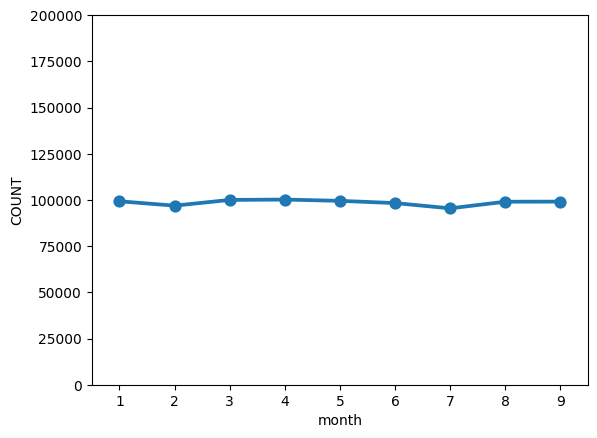

In [54]:
ax = sns.pointplot(res_col, x = 'month', y = 'COUNT')
ax.set_ylim(0, 200000)

O número total de registros de B.O. é aproximadamente constante durante os meses presentes nos dados. Vamos olhar as contagens discriminadas por natureza do fato relatado.

In [55]:
nat_topcinco = db_count_unique_vals('NATUREZA_APURADA')['NATUREZA_APURADA'].head().to_list()

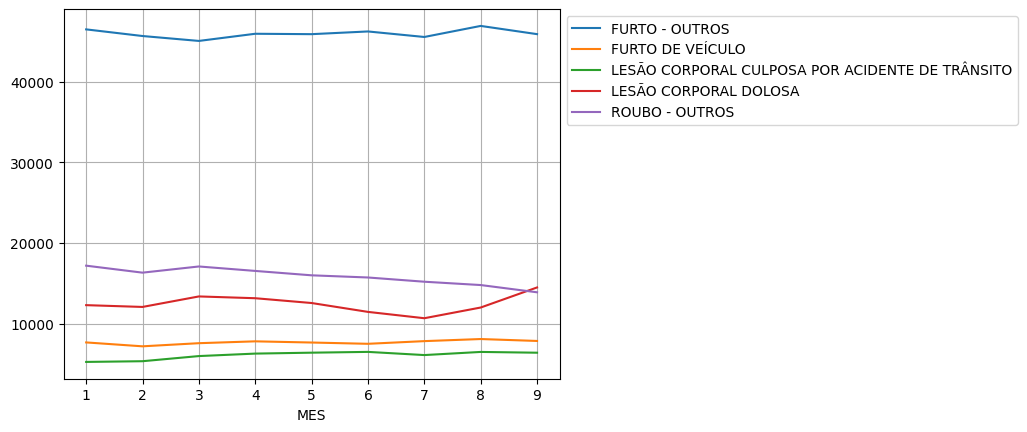

In [56]:
mesregistro_nat = con.sql(f'''
    select month(DATA_REGISTRO) as MES, count(month(DATA_REGISTRO)) as COUNT, NATUREZA_APURADA
    from dados_criminais
    where NATUREZA_APURADA in {nat_topcinco}
    group by all;
    '''
).df()
ax = mesregistro_nat.pivot(index = 'MES', columns =  'NATUREZA_APURADA', values = 'COUNT').plot(grid = True)
ax.legend(bbox_to_anchor=(1, 1))

Vemos que todas as séries são aproximadamente constantes, com exceção de roubos, que apresenta uma tendência geral de queda enquanto lesão corporal apresenta crescimento a partir do mês de julho.

<h3>Col: DATA_OCORRENCIA_BO</h3>

In [57]:
db_count_unique_vals('DATA_OCORRENCIA_BO', func= 'year')

,year,COUNT,REL_FREQ
0,2024,863719,97.295675
1,2023,20523,2.311862
2,2022,1224,0.137880
3,2021,595,0.067025
4,2014,422,0.047537
5,2020,279,0.031429
6,2019,188,0.021178
7,2018,153,0.017235
8,2017,107,0.012053
9,2016,82,0.009237


<Axes: xlabel='year'>

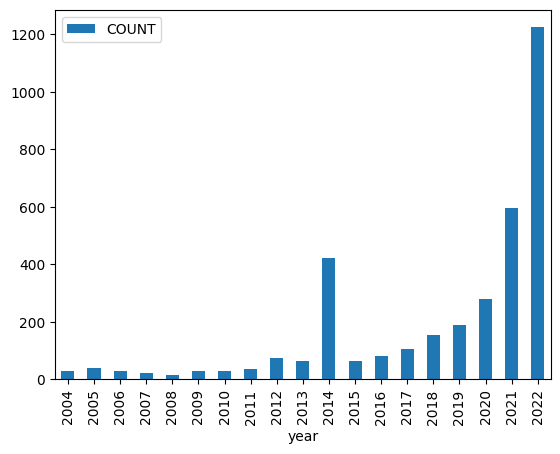

In [58]:
db_count_unique_vals('DATA_OCORRENCIA_BO', func= 'year').query('year < 2023').sort_values('year').plot(kind = 'bar', x = 'year', y = 'COUNT')

Excluindo 2024 e 2023, temos fatos reportados desde 2004. Dependendo do crime relatado, é possível que já tenham sido prescritos (<a href= 'https://www.tjdft.jus.br/consultas/jurisprudencia/jurisprudencia-em-temas/a-doutrina-na-pratica/extincao-da-punibilidade/prescricao-penal'>ref</a>). Vamos avaliar.

In [59]:
res_query = con.sql(f'''
    select year(DATA_OCORRENCIA_BO) as year, NATUREZA_APURADA, count(NATUREZA_APURADA) as QUANTIDADE
    from dados_criminais
    group by year(DATA_OCORRENCIA_BO), NATUREZA_APURADA;
    '''
).df().sort_values('year').set_index(['year', 'NATUREZA_APURADA'])
res_query.xs(2004)

,QUANTIDADE
NATUREZA_APURADA,
ESTUPRO DE VULNERÁVEL,20
FURTO DE VEÍCULO,1
LESÃO CORPORAL DOLOSA,2
LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,1
ESTUPRO,5


Por exemplo, ao filtrarmos os fatos ocorridos no ano 2004, vemos que houve lesão corporal culposa dentre as naturezas que foram relatados. Nesse caso, a pena máxima é de um ano então a prescrição punitiva é de 4 anos. Podemos olhar as naturezas mais frequentes até 2014.

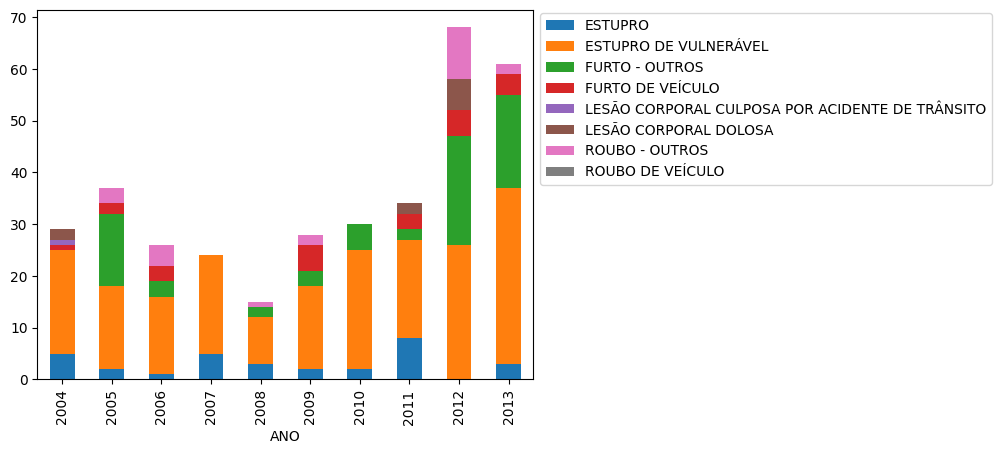

In [60]:
ax = con.sql(f'''
    with ocorr_porano as (
        select *
        from (
            select ANO, COUNT, NATUREZA_APURADA, COUNT, row_number() over (
                partition by ANO
                order by COUNT desc
            ) as n
            from (
                select year(DATA_OCORRENCIA_BO) as ANO, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
                from dados_criminais
                group by all
                order by ANO, COUNT desc
            )
        ) as lim_table
        where n <= 5
    )
    pivot ocorr_porano
    on NATUREZA_APURADA
    using sum(COUNT)
    group by ANO;
    '''
).df().set_index('ANO').iloc[:10, :].plot(kind = 'bar', stacked = True)
ax.legend(bbox_to_anchor=(1, 1.01))

Estupro de vulnerável é não somente a única natureza que aparece em todos os anos como é a mais reportada em cada ano, na janela de tempo mostrada no gráfico acima.

<h3>Col: HORA_OCORRENCIA_BO</h3>

In [61]:
db_count_unique_vals('HORA_OCORRENCIA_BO', func = 'hour')

,hour,COUNT,REL_FREQ
0,19.0,37952,6.067990
1,20.0,37532,6.000838
2,18.0,33744,5.395190
3,21.0,32961,5.269999
4,22.0,30555,4.885314
5,17.0,30113,4.814644
6,12.0,29955,4.789382
7,15.0,29458,4.709919
8,10.0,29444,4.707681
9,16.0,29158,4.661953


Essa coluna é melhor descrita pela coluna DESC_PERIODO.

<h3>Col: DESC_PERIODO</h3>

In [62]:
db_count_unique_vals('DESC_PERIODO')

,DESC_PERIODO,COUNT,REL_FREQ
0,NULL,625447,70.454960
1,A tarde,64282,7.241198
2,A noite,60081,6.767967
3,Pela manhã,57700,6.499753
4,De madrugada,50137,5.647801
5,Em hora incerta,30068,3.387081
6,EM HORA INCERTA,6,0.000676
7,DE MADRUGADA,2,0.000225
8,A NOITE,2,0.000225
9,A TARDE,1,0.000113


Temos descrições em letras maíusculas e outras não. Vamos uniformizar deixando todas em maiúsculo.

In [63]:
con.sql(f'''
    update dados_criminais
    set DESC_PERIODO = upper(DESC_PERIODO);
    '''
)

In [64]:
db_count_unique_vals('DESC_PERIODO')

,DESC_PERIODO,COUNT,REL_FREQ
0,NULL,625447,70.454960
1,A TARDE,64283,7.241311
2,A NOITE,60083,6.768192
3,PELA MANHÃ,57700,6.499753
4,DE MADRUGADA,50139,5.648027
5,EM HORA INCERTA,30074,3.387757


Temos muitos valores null. Será que todos os NULL são também horários null?

In [65]:
con.sql(f'''
    select HORA_OCORRENCIA_BO, DESC_PERIODO
    from dados_criminais
    where DESC_PERIODO = 'NULL'
    '''
).df().head()

,HORA_OCORRENCIA_BO,DESC_PERIODO
0,19:30:00,NULL
1,23:00:00,NULL
2,23:00:00,NULL
3,00:20:00,NULL
4,01:00:00,NULL


Como a resposta é não, vamos utilizar as horas para preencher a DESC_PERIODO seguindo esse <a href= "https://www12.senado.leg.br/manualdecomunicacao/estilos/hora">manual</a>

In [66]:
con.sql(f'''
    update dados_criminais
    set DESC_PERIODO = (
        case
            when hour(HORA_OCORRENCIA_BO) < 6
                then 'DE MADRUGADA'
            when hour(HORA_OCORRENCIA_BO) < 12
                then 'PELA MANHÃ'
            when hour(HORA_OCORRENCIA_BO) < 18
                then 'A TARDE'
            else
                'A NOITE'
        end
    )
    where DESC_PERIODO = 'NULL';
    '''
)

In [67]:
db_count_unique_vals('DESC_PERIODO')

,DESC_PERIODO,COUNT,REL_FREQ
0,A NOITE,260060,29.295075
1,A TARDE,237874,26.795881
2,PELA MANHÃ,205833,23.186546
3,DE MADRUGADA,153885,17.334741
4,EM HORA INCERTA,30074,3.387757


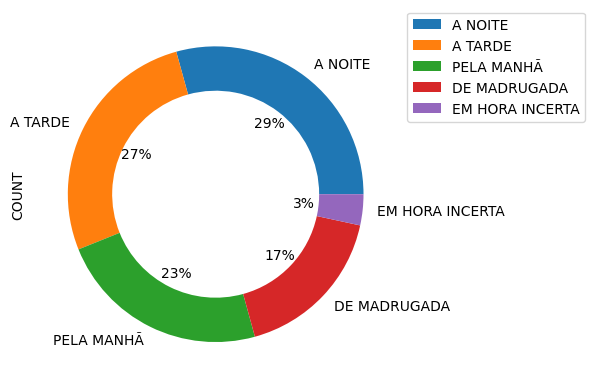

In [68]:
col_df = db_count_unique_vals('DESC_PERIODO')[['DESC_PERIODO', 'COUNT']]
ax = col_df.plot(kind = 'pie', y = 'COUNT', labels = col_df['DESC_PERIODO'],  autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax.legend(bbox_to_anchor=(1, 1.01))

A maioria dos fatos ocorreram a noite. Discriminamos os períodos pelas cinco maiores naturezas por período.

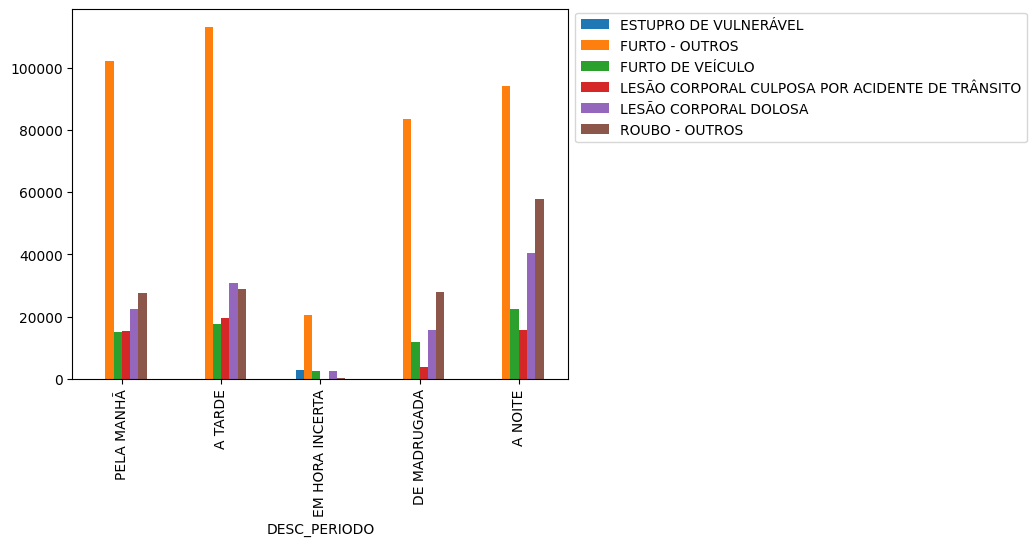

In [69]:
ax = con.sql(f'''
    with periodo_nat as (
        select *
        from (
            select DESC_PERIODO, COUNT, NATUREZA_APURADA, row_number() over (
                partition by DESC_PERIODO
                order by COUNT desc
            ) as n
            from (
                select DESC_PERIODO, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
                from dados_criminais
                group by all
                order by DESC_PERIODO, COUNT desc
            )
        ) as lim_table
        where n <= 5
    )
    pivot periodo_nat
    on NATUREZA_APURADA
    using sum(COUNT)
    group by DESC_PERIODO;
    '''
).df().set_index('DESC_PERIODO').plot(kind = 'bar')
ax.legend(bbox_to_anchor=(1, 1.01))

Furto é o que mais ocorreu em todos os períodos. Se omitirmos furto, temos que roubo ocorreu mais a noite, de manhã e de madrugada enquanto a tarde o que mais ocorreu foi lesão corporal dolosa.

<h3>Col: DESCR_SUBTIPOLOCAL</h3>

In [70]:
col_df = db_count_unique_vals('DESCR_SUBTIPOLOCAL')
col_df

,DESCR_SUBTIPOLOCAL,COUNT,REL_FREQ
0,Via Pública,586416,66.058221
1,Casa,97739,11.010041
2,Outros,26703,3.008023
3,Metroviário e Ferroviário Metropolitano,24217,2.727981
4,NULL,11741,1.322593
...,...,...,...
315,LOTEAMENTO,1,0.000113
316,Heliporto,1,0.000113
317,Lan House/Fliperama,1,0.000113
318,Templo e Afins,1,0.000113


Temos palavras em caixa alta e também em caixa alta-baixa. Por conta disso, vamos uniformizar todas em caixa alta.

In [71]:
con.sql(f'''
    update dados_criminais
    set DESCR_SUBTIPOLOCAL = upper(DESCR_SUBTIPOLOCAL)
    '''
)

In [72]:
col_df = db_count_unique_vals('DESCR_SUBTIPOLOCAL')
col_df

,DESCR_SUBTIPOLOCAL,COUNT,REL_FREQ
0,VIA PÚBLICA,586416,66.058221
1,CASA,97773,11.013871
2,OUTROS,26703,3.008023
3,METROVIÁRIO E FERROVIÁRIO METROPOLITANO,24217,2.727981
4,NULL,11741,1.322593
...,...,...,...
299,SINAGOGA,1,0.000113
300,ENTIDADE ASSISTENCIAL,1,0.000113
301,TEMPLO E AFINS,1,0.000113
302,PALÁCIO DOS BANDEIRANTES,1,0.000113


In [73]:
col_df.head(10)

,DESCR_SUBTIPOLOCAL,COUNT,REL_FREQ
0,VIA PÚBLICA,586416,66.058221
1,CASA,97773,11.013871
2,OUTROS,26703,3.008023
3,METROVIÁRIO E FERROVIÁRIO METROPOLITANO,24217,2.727981
4,NULL,11741,1.322593
5,CASAS,6095,0.686586
6,MERCADO,5776,0.650651
7,VEÍCULO EM MOVIMENTO,4866,0.548142
8,TRANSEUNTE,4624,0.520881
9,LOJAS,4369,0.492156


Temos alguns lugares que estão no plural o que pode indicar que temos variantes no singular e no plural. Vamos olhar mais atentamente.

In [74]:
res_col = compare_str(col_df['DESCR_SUBTIPOLOCAL'], dataframe = True)
res_col.head(25)

,string1,string2,"(pos_str1, pos_str2)",medida de similaridade
0,APARTAMENTO,APARTAMENTOS,"(11, 15)",0.956522
1,ESCRITÓRIOS,ESCRITÓRIO,"(62, 290)",0.952381
2,BOUTIQUE,BOUTIQUES,"(145, 227)",0.941176
3,CHÁCARA,CHÁCARAS,"(28, 71)",0.933333
4,VIDRAÇARIA,VIDRARIA,"(197, 272)",0.888889
5,CASA,CASAS,"(1, 5)",0.888889
6,DISTRIBUIDORA DE ÁGUA,DISTRIBUIDORA DE GÁS,"(163, 167)",0.878049
7,ESTAÇÃO DE TRATAMENTO DE ESGOTO,ESTAÇÃO DE TRATAMENTO DE ÁGUA,"(131, 139)",0.866667
8,ASSISTÊNCIA TÉCNICA,ASSISTÊNCIA TÉCNICA/OFICINA,"(132, 226)",0.826087
9,AEROPORTUÁRIO,PORTUÁRIO,"(57, 109)",0.818182


In [75]:
for i in np.r_[np.arange(6), 8, 10, 19]:
    db_replace('DESCR_SUBTIPOLOCAL', res_col.loc[i, 'string2'], res_col.loc[i, 'string1'])

Obtemos, agora, a natureza por local e como há muitos locais, vamos somente usar os 10 lugares com maior ocorrências.

In [76]:
col_df = db_count_unique_vals('DESCR_SUBTIPOLOCAL')

In [77]:
toplocal = col_df['DESCR_SUBTIPOLOCAL'].head(10).to_list()
toplocal = [i for i in toplocal if i not in ('NULL', 'OUTROS')]

Dentre os 10 locais com maior frequência nos registros, há NULL e OUTROS. Acima eu filtrei NULL e OUTROS e deixei somente 8 locais.

In [78]:
con.sql(f'''
    select * exclude rows
    from (
        select DESCR_SUBTIPOLOCAL, COUNT, NATUREZA_APURADA, row_number() over (
            partition by DESCR_SUBTIPOLOCAL
            order by COUNT desc
        ) as rows
        from (
            select DESCR_SUBTIPOLOCAL, NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT
            from dados_criminais
            where DESCR_SUBTIPOLOCAL in {toplocal}
            group by all
            order by DESCR_SUBTIPOLOCAL, COUNT desc
        )
    ) as lim_table
    where rows <= 2;
    '''
).df().set_index(['DESCR_SUBTIPOLOCAL']).loc[toplocal].set_index('NATUREZA_APURADA', append = True)

COUNT
DESCR_SUBTIPOLOCAL                      NATUREZA_APURADA                                       
VIA PÚBLICA                             FURTO - OUTROS                                   254667
                                        ROUBO - OUTROS                                   124563
CASA                                    LESÃO CORPORAL DOLOSA                             46817
                                        FURTO - OUTROS                                    36100
METROVIÁRIO E FERROVIÁRIO METROPOLITANO FURTO - OUTROS                                    20218
                                        ROUBO - OUTROS                                     3299
APARTAMENTO                             LESÃO CORPORAL DOLOSA                              3661
                                        FURTO - OUTROS                                     2064
MERCADO                                 FURTO - OUTROS                                     4212
                                        LESÃO CORPORAL DOLOSA                               644
VEÍCULO EM MOVIMENTO                    LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO    2519
                                        ROUBO DE VEÍCULO                                   1059
TRANSEUNTE                              ROUBO - OUTROS                                     1664
                                        FURTO - OUTROS                                     1053
ESTACIONAMENTO PÚBLICO                  FURTO DE VEÍCULO                                   2558
                                        FURTO - OUTROS                                     1422

Olhando os oito locais onde ocorreram o maior número de ocorrências relatadas, vemos que furto é a ocorrência que predomina em todos com exceção de casa, onde os registros mostram que lesão corporam dolosa foi a mais citada, e veículo em movimento, onde a mais documentada foi lesão corporal culposa por acidente de trânsito.

<h3>Col: BAIRRO</h3>

In [79]:
col = db_count_unique_vals('BAIRRO')
col

,BAIRRO,COUNT,REL_FREQ
0,CENTRO,65915,7.425151
1,NULL,12758,1.437155
2,RURAL,12338,1.389843
3,PINHEIROS,8518,0.959530
4,BELA VISTA,8123,0.915035
...,...,...,...
34460,Padroeira,1,0.000113
34461,NÚCLEO SANTA CRUZ,1,0.000113
34462,SÍTIO PAULICÉIA,1,0.000113
34463,CHACARA CATUACU,1,0.000113


Uniformizamos

In [80]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = upper(BAIRRO);
    '''
)

In [81]:
db_count_unique_vals('BAIRRO')

,BAIRRO,COUNT,REL_FREQ
0,CENTRO,66068,7.442387
1,NULL,12758,1.437155
2,RURAL,12386,1.395250
3,PINHEIROS,8524,0.960206
4,BELA VISTA,8133,0.916161
...,...,...,...
32755,RESIDENCIAL FURTUNA,1,0.000113
32756,RESIDENCIAL PROMISSÃO,1,0.000113
32757,VILA BRAS CUBAS,1,0.000113
32758,VILA FINZETO,1,0.000113


Como temos mais de 32 mil bairros e muito provavelmente temos erros. Vamos buscar por erros utilizando outra estratégia: distribuição de primeiras letras.

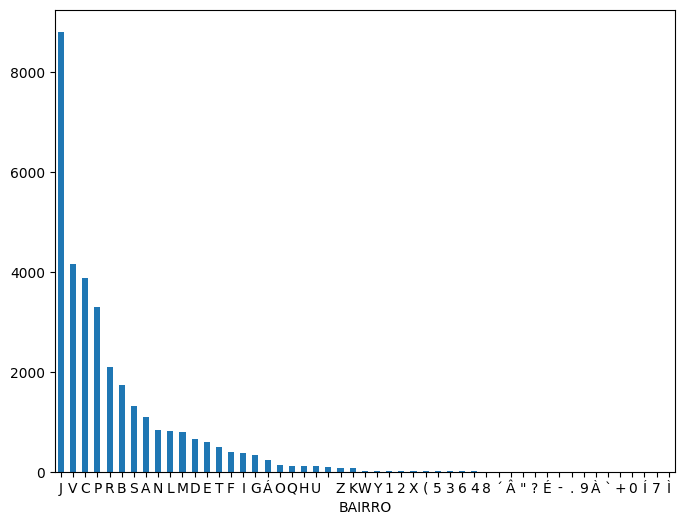

In [82]:
ax = db_count_unique_vals('BAIRRO')['BAIRRO'].str[0].value_counts().plot(kind = 'bar', rot=0, figsize = (8,6))

Temos acentos, números entre outros. Filtramos 

In [83]:
col_prob = con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO not similar to '^[ÁÉÍÓÚA-Z].*';
    '''
).df()
col_prob

,BAIRRO
0,(L-10)
1,JARDIM ALVORADA
2,BAIRRO PAIOL GRANDE
3,CENTRO
4,BAIRRO PEDERNEIRAS
...,...
186,22 DE MAIO
187,JARDIM SAMAMBAIA
188,VILA AZUL (ZONA RURAL)
189,VILA TONICO ADOLFO


In [84]:
col_prob.values.reshape(-1)

array(['(L-10)', ' JARDIM ALVORADA', ' BAIRRO  PAIOL GRANDE', ' CENTRO',
       ' BAIRRO PEDERNEIRAS', ' VILA', '.',
       '54WP+6G, PEDREIRA - SP, 13920-000', ' ZEQUINHA AMÊNDOLA',
       '(O-16)', '270', ' PQ. GRAMADO', ' SANTO ANTONIO',
       ' JARDIM HELENA', ' CACHOEIRA', ' VL JAGUARA',
       ' VILA SÃO BENEDITO', ' JARDIM SANTA TEREZA', ' JARDIM CONCEIÇÃO',
       ' TERRA NOVA II', ' EDMILSON JOSE CORREIA', ' GUANABARA 2',
       '(N-19)', ' CIDADE ALTA', '5º DISTRITO INDUSTRIAL', ' COHAB I',
       '(O-14)', ' PREFEITO ELIDIO BRAULIO DE MENEZES',
       ' SÃO ROQUE FARTURA', '12 DE SETEMBRO II', ' INDIAPORA',
       '1ª SEÇÃO', '72', ' RESIDENCIAL CAMPO CAMANDUCAIA',
       'ÂNGELO PARMENONDI', ' VILA JARDIM', '68',
       ' JARDIM RESIDENCIAL VECCON BURITI', ' TERRA PRETA',
       '????????????', '188', '2ª ZONA INDUSTRIAL',
       '4º DISTRITO INDUSTRIAL', 'ÌNDAIA', '3 MARIAS', ' COLÉGIO VELHO.',
       '-', ' BAIRRO FRADES PERIS 8', ' PARQUE HIPÓLYTO',
       ' JARDIM DOS 

Corrigimos os espaços à direita e/ou à esquerda 

In [85]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = trim(BAIRRO);
    '''
)

In [86]:
col_prob = con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO not similar to '^[ÁÉÍÓÚA-Z].*';
    '''
).fetchnumpy()
col_prob

{'BAIRRO': array(['.', '(O-16)', '(O-14)', '12 DE SETEMBRO II', '(L-10)', '1ª SEÇÃO',
        '(N-19)', '5º DISTRITO INDUSTRIAL',
        '54WP+6G, PEDREIRA - SP, 13920-000', '270', '72',
        'ÂNGELO PARMENONDI', '68', '-', '2ª ZONA INDUSTRIAL', '3 MARIAS',
        '5A', '23 DE MAIO', 'ÀREA RURAL', '10º DISTRITO INDUSTRIAL',
        '3 BARRAS', '13660000', '1079', '58FC 3MRS+RF', '3 PONTES', '?',
        '1', '????????????', '188', '4º DISTRITO INDUSTRIAL', 'ÌNDAIA',
        '5ª ESCOLA', '2Â° DISTRITO INDUSTRIAL DOMINGOS FERRARI',
        '8º DISTRITO INDUSTRIAL', '´ROX. IGREJA CONGRESSÃO CRISTÃ', '244',
        '50 COLÔNIA', '3095', '(N-17)', '...', '600',
        '2° DISTRITO INDUSTRIAL (DOMINGOS FERRARI)',
        '"CASINHAS POPULARES"', '500', "`Q. D'AVILLE", '176', '80 CASAS',
        '(L-9)', '0', '60', '61',
        '2° DISTRITO INDUSTRIAL DOMINGOS FERRARI', '(N-15)', '3ª ALIANÇA',
        '+ 400M', '3° DISTRITO INDUSTRIAL (VIRGÍLIO OMETTO PAVAN)', '209',
        '4551', '21

Alguns bairros possuem somente sinais de pontuação entre outros que vamos renomear para NULL, como as demais colunas.

In [87]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = 'NULL'
    where BAIRRO in (
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '^[\+\.?].*'
        )
        union
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '^-[0-9].*'
        )
        union
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '[0-9]+'
        )
        union
        (
            select distinct BAIRRO 
            from dados_criminais
            where BAIRRO similar to '[-]+'
        )
    );
    '''
)

Certos bairros possuem sinais a esquerda.

In [88]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = trim(BAIRRO, '`´-"');
    '''
)

In [89]:
con.sql(f'''
    select distinct BAIRRO 
    from dados_criminais
    where BAIRRO not similar to '^[ÁÉÍÓÚA-Z].*';
    '''
).fetchnumpy()

{'BAIRRO': array(['(L-11)', '1A ZONA INDUSTRIAL', '400 CASAS', 'ÂNGELO DE ROSA',
        '1ª ZONA INDUSTRIAL', '9 DE JULHO', '1ª ZONA INDUSTRIAL DE JAÚ',
        'À BEIRA DA REFERIDA RODOVIA', '24 DE OUTUBRO', '3M',
        '18 DO FORTE', '8O DISTRITO INDUSTRIAL', '2A ZONA INDUSTRIAL',
        'ÂNGELO PARMINONDI', '2ª ZONA INDUSTRIAL',
        '4º DISTRITO INDUSTRIAL', 'ÌNDAIA', '3 MARIAS',
        '10º DISTRITO INDUSTRIAL',
        '2° DISTRITO INDUSTRIAL (DOMINGOS FERRARI)', '3 BARRAS',
        'ÀREA RURAL', '5ª ESCOLA',
        '2Â° DISTRITO INDUSTRIAL DOMINGOS FERRARI',
        '8º DISTRITO INDUSTRIAL', '5A', '23 DE MAIO', '(N-17)',
        '50 COLÔNIA', '58FC 3MRS+RF', '3 PONTES', '(L-10)', '(N-19)',
        '(O-16)', '5º DISTRITO INDUSTRIAL', '(O-14)',
        '54WP+6G, PEDREIRA - SP, 13920-000', '12 DE SETEMBRO II',
        '1ª SEÇÃO', 'ÂNGELO PARMENONDI', '3ª ALIANÇA', '(L-9)',
        '12 DE SETEMBRO', '2° DISTRITO INDUSTRIAL DOMINGOS FERRARI',
        '(N-15)', ' PRINCESA ISA

Removemos espaços que restaram.

In [90]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = trim(BAIRRO);
    '''
)

In [91]:
con.sql(f'''
    select distinct ID, BAIRRO 
    from dados_criminais
    where BAIRRO similar to '.*[0-9]A.*';
    '''
)

┌────────┬─────────────────────────────────────────────┐
│   ID   │                   BAIRRO                    │
│ int64  │                   varchar                   │
├────────┼─────────────────────────────────────────────┤
│ 277344 │ JARDIM NOVA REPUBLICA (4A ETAPA)            │
│ 279416 │ JARDIM SANTA RITA - 2A PARTE                │
│ 477418 │ JARDIM NOVA REPUBLICA (4A ETAPA)            │
│ 479550 │ JARDIM SANTA RITA - 2A PARTE                │
│ 748505 │ 1A ZONA INDUSTRIAL                          │
│ 847698 │ 2A ZONA INDUSTRIAL                          │
│  83302 │ JARDIM SANTA RITA - 2A PARTE                │
│ 574718 │ JARDIM NOVA REPUBLICA (4A ETAPA)            │
│ 574731 │ JARDIM NOVA REPUBLICA (4A ETAPA)            │
│ 576913 │ JARDIM SANTA RITA - 2A PARTE                │
│    ·   │         ·                                   │
│    ·   │         ·                                   │
│    ·   │         ·                                   │
│ 847685 │ 1A ZONA INDUSTRIAL  

In [92]:
con.sql(f'''
    select distinct ID, BAIRRO 
    from dados_criminais
    where BAIRRO like '%Â°%';
    '''
)

┌────────┬──────────────────────────────────────────┐
│   ID   │                  BAIRRO                  │
│ int64  │                 varchar                  │
├────────┼──────────────────────────────────────────┤
│ 644157 │ 2Â° DISTRITO INDUSTRIAL DOMINGOS FERRARI │
└────────┴──────────────────────────────────────────┘

In [93]:
con.sql(f'''
    update dados_criminais
    set BAIRRO = replace(BAIRRO, 'Â°', '°')
    where ID = 644157;
    '''
)

<h3>Col: Logradouro</h2>

In [94]:
db_count_unique_vals('LOGRADOURO')

,LOGRADOURO,COUNT,REL_FREQ
0,VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,142759,16.081426
1,AVENIDA PAULISTA,3249,0.365991
2,AVENIDA CRUZEIRO DO SUL,2644,0.297840
3,AVENIDA MÁRIO DE ANDRADE,1896,0.213579
4,PRAÇA DA LUZ,1838,0.207046
...,...,...,...
130240,RUA ARTUR JOSÉ HOGRAEFE,1,0.000113
130241,RUA JOSÉ FAILLACE,1,0.000113
130242,AVENIDA MANUEL C. GOMES,1,0.000113
130243,RUA MANOEL HENRIQUE FLORINDO,1,0.000113


Temos um número considerável de dados com vedação da divulgação do logradouro. Além disso, devido ao número de logradouros único, provavelmente há diversos erros presentes. Por outro lado, a Avenida Paulista é o logradouro com maior número de ocorrências, seguida pela Avenida Cruzeiro do Sul, Avenida Mario de Andrade e Praça da Luz. Como pode haver um logradouro com o mesmo nome em municípios ou até mesmo bairros diferentes, vamos olhar por bairro.

In [95]:
con.sql(f'''
    select LOGRADOURO, count(LOGRADOURO) as COUNT, BAIRRO
    from dados_criminais
    where LOGRADOURO <> 'VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS'
    group by all
    order by COUNT desc
    limit 10;
    '''
).df()

,LOGRADOURO,COUNT,BAIRRO
0,AVENIDA MÁRIO DE ANDRADE,1896,BARRA FUNDA
1,PRAÇA DA LUZ,1817,BOM RETIRO
2,AVENIDA PAULISTA,1643,BELA VISTA
3,AVENIDA CRUZEIRO DO SUL,1456,SANTANA
4,RUA DOMINGOS DE MORAIS,1000,VILA MARIANA
5,AVENIDA SENADOR TEOTONIO VILELA,923,CIDADE DUTRA
6,RUA DA CONSOLAÇÃO,907,CONSOLAÇÃO
7,RUA AUGUSTA,804,CONSOLACAO
8,AVENIDA PAULISTA,723,JARDIM PAULISTA
9,AVENIDA CRUZEIRO DO SUL,697,CANINDÉ


Por meio dos dados disponíveis, a Avenida Mario de Andrade na Barra Funda - SP é o logradouro com maior número de ocorrências registradas, seguido pela Praça da Luz no Bom Retiro - SP. 

In [96]:
con.sql(f'''
    select LOGRADOURO, count(LOGRADOURO) as COUNT, BAIRRO, NATUREZA_APURADA
    from dados_criminais
    where LOGRADOURO <> 'VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS'
    group by all
    order by COUNT desc
    limit 10;
    '''
).df()

,LOGRADOURO,COUNT,BAIRRO,NATUREZA_APURADA
0,AVENIDA MÁRIO DE ANDRADE,1610,BARRA FUNDA,FURTO - OUTROS
1,PRAÇA DA LUZ,1576,BOM RETIRO,FURTO - OUTROS
2,AVENIDA PAULISTA,1355,BELA VISTA,FURTO - OUTROS
3,AVENIDA CRUZEIRO DO SUL,979,SANTANA,FURTO - OUTROS
4,RUA DOMINGOS DE MORAIS,758,VILA MARIANA,FURTO - OUTROS
5,AVENIDA SENADOR TEOTONIO VILELA,731,CIDADE DUTRA,FURTO - OUTROS
6,RUA DA CONSOLAÇÃO,677,CONSOLAÇÃO,FURTO - OUTROS
7,AVENIDA PAULISTA,615,JARDIM PAULISTA,FURTO - OUTROS
8,RUA AUGUSTA,589,CONSOLACAO,FURTO - OUTROS
9,AVENIDA FRANCISCO MATARAZZO,545,BARRA FUNDA,FURTO - OUTROS


Discriminando pela natureza do ocorrido, vemos que o top dez foi devido a furto. 

In [97]:
con.sql(f'''
    select LOGRADOURO, count(LOGRADOURO) as COUNT, BAIRRO, NATUREZA_APURADA
    from dados_criminais
    where LOGRADOURO <> 'VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS'
    and NATUREZA_APURADA <> 'FURTO - OUTROS'
    group by all
    order by COUNT desc
    limit 10;
    '''
).df()

,LOGRADOURO,COUNT,BAIRRO,NATUREZA_APURADA
0,AVENIDA CRUZEIRO DO SUL,424,SANTANA,ROUBO - OUTROS
1,AVENIDA MÁRIO DE ANDRADE,269,BARRA FUNDA,ROUBO - OUTROS
2,AVENIDA PAULISTA,251,BELA VISTA,ROUBO - OUTROS
3,PRAÇA DA LUZ,217,BOM RETIRO,ROUBO - OUTROS
4,RUA AUGUSTA,201,CONSOLACAO,ROUBO - OUTROS
5,RUA DA CONSOLAÇÃO,199,CONSOLAÇÃO,ROUBO - OUTROS
6,RUA DOMINGOS DE MORAIS,182,VILA MARIANA,ROUBO - OUTROS
7,ESTRADA DO CAMPO LIMPO,179,CAMPO LIMPO,ROUBO - OUTROS
8,RUA MOURATO COELHO,163,PINHEIROS,ROUBO - OUTROS
9,AVENIDA CRUZEIRO DO SUL,163,CANINDÉ,ROUBO - OUTROS


Ao omitirmos furto, a Rua Augusta surge no top 5 com um número alto de roubo e a Avenida cruzeiro do sul fica em primeiro. Todo top 10 é de roubo.

<h3>Col: NUMERO_LOGRADOURO</h3>

In [98]:
db_count_unique_vals('NUMERO_LOGRADOURO')

,NUMERO_LOGRADOURO,COUNT,REL_FREQ
0,NULL,142761,16.081651
1,1,41778,4.706182
2,0,35391,3.986703
3,100,15435,1.738712
4,10,8513,0.958967
...,...,...,...
10226,15305,1,0.000113
10227,6091,1,0.000113
10228,9666000,1,0.000113
10229,2000/12/01,1,0.000113


A maior parte dos valores correspondem ao número 1 o que é intrigante, além disso temos o número zero que, ao que parece, foi usado para representar um local sem número ou que não relatado no Boletim de Ocorrência. Vamos substituir 0 e NULL para null.

In [99]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = 'NULL'
    where NUMERO_LOGRADOURO = '0';
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where NUMERO_LOGRADOURO = 'NULL';
    '''
)

Vamos olhar os maiores números

In [100]:
con.sql(f'''
    select distinct NUMERO_LOGRADOURO, length(NUMERO_LOGRADOURO) as 'TAMANHO', 
    from dados_criminais
    order by TAMANHO desc;
    '''
)

┌───────────────────┬─────────┐
│ NUMERO_LOGRADOURO │ TAMANHO │
│      varchar      │  int64  │
├───────────────────┼─────────┤
│ 10000000000       │      11 │
│ 1399101680        │      10 │
│ 1399628607        │      10 │
│ 1139757569        │      10 │
│ 1898513246        │      10 │
│ 1198438648        │      10 │
│ 1498434332        │      10 │
│ 1199547636        │      10 │
│ 1520000001        │      10 │
│ 1194038597        │      10 │
│  ·                │       · │
│  ·                │       · │
│  ·                │       · │
│ 281               │       3 │
│ 624               │       3 │
│ 224               │       3 │
│ 199               │       3 │
│ 379               │       3 │
│ 340               │       3 │
│ 446               │       3 │
│ 396               │       3 │
│ 621               │       3 │
│ 290               │       3 │
├───────────────────┴─────────┤
│ ? rows            2 columns │
└─────────────────────────────┘

Temos números muito altos que se assemelham a números de telefone. Um dos maiores logradouros do Brasil é a <a href =  'https://pt.wikipedia.org/wiki/Avenida_Sapopemba'> Avenida Sapopemba</a> em São Paulo. Na Wikipedia diz que o número vai até 75.008, mas conferindo no Google StreetView, a avenida vai até por volta de 30000 e depois tem um trecho da estrada de Sapopemba que vai até 6000. Então temos no máximo 5 dígitos.

In [101]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where length(NUMERO_LOGRADOURO) > 5;
    '''
)

Passamos para int

In [102]:
con.sql(f'''
    alter table dados_criminais
    alter column NUMERO_LOGRADOURO type int;
    '''
)

Qualquer número aproximadamente acima de 30000 vou substituir por null, com uma certa margem

In [103]:
con.sql(f'''
    update dados_criminais
    set NUMERO_LOGRADOURO = null
    where NUMERO_LOGRADOURO > 31000;
    '''
)

Temos muito provavelmente diversos outros erros nos números preenchidos, mas não achei uma forma eficaz de filtrá-los.

<h3>Col: LATITUDE & LONGITUDE</h3>

Como estamos trabalhando com os dados de São Paulo, esperamos que latitude e longitude sejam aproximadamente (-23, -46)

In [104]:
db_count_unique_vals('LATITUDE', func = 'round')

,round,COUNT,REL_FREQ
0,-24.0,384860,48.429130
1,-23.0,170911,21.506706
2,0.0,142778,17.966570
3,-21.0,44720,5.627373
4,-22.0,42646,5.366390
5,-20.0,7191,0.904885
6,-25.0,1572,0.197814
7,-32.0,2,0.000252
8,-214649744.0,1,0.000126
9,-6.0,1,0.000126


Primeiramente temos o 0 que corresponde a localização da linha do equador, ou seja, a localização não parece corresponder a localização do ocorrido. Vamos olhar junto com o logradouro.

In [105]:
con.sql(f'''
    select LATITUDE, LONGITUDE, LOGRADOURO, count(LOGRADOURO)
    from dados_criminais
    where LATITUDE = 0 or
    LONGITUDE = 0
    group by all
    '''
).df()

,LATITUDE,LONGITUDE,LOGRADOURO,count(LOGRADOURO)
0,0.0,0.0,RUA DAS ROSAS,1
1,0.0,0.0,RUA THEREZA CARMUSCIANO PAULINI,1
2,0.0,0.0,RUA OXOSSI,1
3,0.0,0.0,AVENIDA RIVER,1
4,0.0,0.0,RUA JOSÉ GUEDES,1
5,0.0,0.0,RUA JOÃO DOMINGOS,1
6,0.0,0.0,RUA GENARO OLAVIDE,1
7,0.0,0.0,AVENIDA PREFEITO ADELINO MENDONÇA,1
8,0.0,0.0,ESTRADA DO ELENCO,1
9,0.0,0.0,VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,142759


Da tabela acima, vemos que há correspondência entre os 0 da latitude e o 0 da longitude, ou seja, o 0 foi usado para indicar que não foi preenchido e para dados com vedação de divulgação. Portanto, vamos mudar os 0s para null.

In [106]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = null,
    LONGITUDE = null
    where LATITUDE = 0
    '''
)

Temos também valores enormes, o que pode indicar erro no preenchimento desses dados.

In [107]:
con.sql(f'''
    select LATITUDE, LONGITUDE, BAIRRO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO
    from dados_criminais
    where round(LATITUDE) < -100
    '''
).df()

,LATITUDE,LONGITUDE,BAIRRO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO
0,-235097648.0,-466182336.0,CARANDIRU,S.PAULO
1,-214649744.0,-492246528.0,MACHADO,NOVO HORIZONTE
2,-207369104.0,-493169696.0,RURAL,S.JOSE DO RIO PRETO


Utilizando o maps do google, pude verificar que quem preencheu esses dados esqueceu de separa os decimais com o ponto

In [108]:
con.sql(f'''
    update dados_criminais
    set LONGITUDE = LONGITUDE/1e7, 
    LATITUDE = LONGITUDE/1e7
    where round(LATITUDE) < -100
    '''
)

In [109]:
db_count_unique_vals('LONGITUDE', func = 'round')

,round,COUNT,REL_FREQ
0,-47.0,424120,65.058160
1,-46.0,118204,18.131979
2,-48.0,45742,7.016623
3,-49.0,26927,4.130484
4,-50.0,17731,2.719858
5,-51.0,9166,1.406024
6,-45.0,7782,1.193725
7,-52.0,2080,0.319063
8,-53.0,107,0.016413
9,-44.0,45,0.006903


Vamos olhar como ficaram os dados.

In [110]:
db_count_unique_vals('LATITUDE', func = 'round')

,round,COUNT,REL_FREQ
0,-24.0,384860,59.035847
1,-23.0,170911,26.217003
2,-21.0,44720,6.859853
3,-22.0,42646,6.541711
4,-20.0,7191,1.103068
5,-25.0,1572,0.241138
6,-49.0,2,0.000307
7,-32.0,2,0.000307
8,-47.0,1,0.000153
9,-28.0,1,0.000153


Temos alguns latitudes que são maiores que -20.

In [111]:
con.sql(f'''
    select ID, LATITUDE, LONGITUDE, CIDADE, NOME_DELEGACIA, LOGRADOURO, BAIRRO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO, DATA_REGISTRO, DATA_OCORRENCIA_BO
    from dados_criminais
    where LATITUDE::int > -20
    '''
).df()

,ID,LATITUDE,LONGITUDE,CIDADE,NOME_DELEGACIA,LOGRADOURO,BAIRRO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,DATA_REGISTRO,DATA_OCORRENCIA_BO
0,677255,-5.529876,-47.471695,GUARULHOS,DELEGACIA DA MULHER ONLINE,RUA ALAGOAS,NOVA PONTE ALTA,GUARULHOS,2024-07-01,2024-07-01
1,751222,-17.541517,-42.754822,MENDONCA,DEL.POL.MENDONCA,RUA SEBASTIÃO VOLPE X RU DR JACINTO DE SOUZA,CENTRO,MENDONCA,2024-08-09,2024-04-13
2,756234,-15.356818,-38.988258,ILHA COMPRIDA,DEL.POL.ILHA COMPRIDA,AVENIDA BEIRA MAR,BALNEÁRIO SINFONIA DO MAR,ILHA COMPRIDA,2024-08-09,2024-08-08


No primeiro caso da tabela acima, as coordenadas apontam para a cidade chamada Imperatriz no Maranhão e embora haja uma rua alagoas, muito provavelmente se trata do lugar errado pois o registro foi feito na cidade de Guarulhos e o município de circunscrição também é Guarulhos. Procurando o bairro e o município no google, encontrei que a rua tem as coordenadas (-23.398199, -46.424011). No segundo caso, a coordenada correta é (-21.182924, -49.583108). O último possui a seguinte geolocalização: (-24.842526, -47.684187).

In [112]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = -23.398199,
    LONGITUDE = -46.424011
    where ID = 677255;
    
    update dados_criminais
    set LATITUDE = -21.182924,
    LONGITUDE = -49.583108
    where ID = 751222;
    
    update dados_criminais
    set LATITUDE = -24.842526,
    LONGITUDE = -47.684187
    where ID = 756234;
    '''
)

In [113]:
con.sql(f'''
    select ID, LATITUDE, LONGITUDE, CIDADE, NOME_DELEGACIA, LOGRADOURO, BAIRRO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO, DATA_REGISTRO, DATA_OCORRENCIA_BO
    from dados_criminais
    where LATITUDE::int < -30
    '''
).df()

,ID,LATITUDE,LONGITUDE,CIDADE,NOME_DELEGACIA,LOGRADOURO,BAIRRO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,DATA_REGISTRO,DATA_OCORRENCIA_BO
0,515310,-46.618233,-46.618233,S.PAULO,13Âº D.P. CASA VERDE,AVENIDA ZAKI NARCHI,CARANDIRU,S.PAULO,2024-06-24,2024-06-24
1,556515,-49.224651,-49.224651,NOVO HORIZONTE,DEL.POL.NOVO HORIZONTE,ELISIARIO SARDELLA,MACHADO,NOVO HORIZONTE,2024-06-28,2024-06-28
2,557457,-49.316971,-49.316971,S.JOSE DO RIO PRETO,03º D.P. S.JOSE RIO PRETO,ESTRADA VICINAL PARA TALHADO,RURAL,S.JOSE DO RIO PRETO,2024-07-04,2024-07-04
3,571927,-32.006485,-52.038315,S.JOSE DO RIO PARDO,DEL.SEC.CASA BRANCA,JOÃO BATISTA RIBEIRO DE LIMA,REDENTOR I,S.JOSE DO RIO PARDO,2024-06-30,2024-06-30
4,571928,-32.006485,-52.038315,S.JOSE DO RIO PARDO,DEL.SEC.CASA BRANCA,JOÃO BATISTA RIBEIRO DE LIMA,REDENTOR I,S.JOSE DO RIO PARDO,2024-06-30,2024-06-30


In [114]:
con.sql(f'''
    update dados_criminais
    set LATITUDE = -23.509952,
    LONGITUDE = -46.618169
    where ID= 515310;
    
    update dados_criminais
    set LATITUDE = -21.476402,
    LONGITUDE = -49.206884
    where ID= 556515;
    
    update dados_criminais
    set LATITUDE = -20.736927,
    LONGITUDE = -49.316984
    where ID= 557457;

    update dados_criminais
    set LATITUDE = -21.585403,
    LONGITUDE = -46.905198
    where ID= 571927;

    update dados_criminais
    set LATITUDE = -21.585403,
    LONGITUDE = -46.905198
    where ID= 571928;
    '''
)

Como temos latitude e longitude, vamos criar uma coluna de pontos geoespaciais.

In [115]:
con.sql(f'''
    alter table dados_criminais
    add column geom geometry;
    update dados_criminais
    set geom = st_point(LONGITUDE, LATITUDE);
    '''
)

Note que não temos o município onde ocorreu o fato. Podemos usar um shapefile para intersectar os pontos com a geometria de cada estado. Porém, ao tentar fazer o join, provavelmente devido ao join não ser otimizado (memória), meu pc trava completamente; por isso vou usar geopandas para fazer essa operação.

In [116]:
dcriminais_df = con.sql(f'''
    select ID, ST_AsText(geom) as geom from dados_criminais
    '''
).df()

In [117]:
dcriminais_gdf = gpd.GeoDataFrame(dcriminais_df, geometry= gpd.GeoSeries.from_wkt(dcriminais_df['geom']))
dcriminais_gdf.head()

,ID,geom,geometry
0,1,None,None
1,2,POINT (-46.63783264160156 -23.551559448242188),POINT (-46.63783 -23.55156)
2,3,POINT (-46.63404846191406 -23.55120086669922),POINT (-46.63405 -23.55120)
3,4,POINT (-46.6257438659668 -23.552387237548828),POINT (-46.62574 -23.55239)
4,5,None,None


In [118]:
spmun_gdf = gpd.read_file(r'shapefiles/SP_Municipios_2022.zip')
spmun_gdf.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


Vamos passar o sistema de referência de coordenadas (CRS) do dataframe de municipios para os dados criminais que não tem, antes de fazer o join espacial.

In [119]:
dcriminais_gdf.crs = spmun_gdf.crs

In [120]:
sjoined_gdf = dcriminais_gdf.sjoin(spmun_gdf, how ='left')
sjoined_gdf.head()

,ID,geom,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
0,1,None,None,NaN,NaN,NaN,NaN,NaN
1,2,POINT (-46.63783264160156 -23.551559448242188),POINT (-46.63783 -23.55156),562.0,3550308,São Paulo,SP,1521.202
2,3,POINT (-46.63404846191406 -23.55120086669922),POINT (-46.63405 -23.55120),562.0,3550308,São Paulo,SP,1521.202
3,4,POINT (-46.6257438659668 -23.552387237548828),POINT (-46.62574 -23.55239),562.0,3550308,São Paulo,SP,1521.202
4,5,None,None,NaN,NaN,NaN,NaN,NaN


Será que todos os pontos estão dentro do estado de São Paulo? Filtramos.

In [121]:
sjoined_gdf[(sjoined_gdf['geometry'] != None) & (sjoined_gdf['SIGLA_UF'] != 'SP')]

,ID,geom,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
40763,40764,POINT (-45.39740753173828 -23.8093204498291),POINT (-45.39741 -23.80932),NaN,NaN,NaN,NaN,NaN
235571,235572,POINT (-43.34605407714844 -22.882051467895508),POINT (-43.34605 -22.88205),NaN,NaN,NaN,NaN,NaN
236029,236030,POINT (-44.699073791503906 -22.51302719116211),POINT (-44.69907 -22.51303),NaN,NaN,NaN,NaN,NaN
387203,387204,POINT (-43.29473876953125 -22.819355010986328),POINT (-43.29474 -22.81936),NaN,NaN,NaN,NaN,NaN
436682,436683,POINT (-44.73031234741211 -22.44329071044922),POINT (-44.73031 -22.44329),NaN,NaN,NaN,NaN,NaN
439052,439053,POINT (-45.39740753173828 -23.8093204498291),POINT (-45.39741 -23.80932),NaN,NaN,NaN,NaN,NaN
439287,439288,POINT (-44.95576858520508 -23.38041114807129),POINT (-44.95577 -23.38041),NaN,NaN,NaN,NaN,NaN
457677,457678,POINT (-49.9881591796875 -22.912109375),POINT (-49.98816 -22.91211),NaN,NaN,NaN,NaN,NaN
457729,457730,POINT (-53.514244079589844 -24.406688690185547),POINT (-53.51424 -24.40669),NaN,NaN,NaN,NaN,NaN
551318,551319,POINT (-49.9366340637207 -28.291303634643555),POINT (-49.93663 -28.29130),NaN,NaN,NaN,NaN,NaN


Como o valor nulo da geometria é None, vamos utilizar None, para passar aos pontos fora do Estado

In [122]:
sjoined_gdf[(sjoined_gdf['geometry'] != None) & (sjoined_gdf['SIGLA_UF'] != 'SP')].loc[:, 'geometry'] = None

Isolamos as colunas importantes que são código do município (CD_MUN), nome do município (NM_MUN) e UF (SIGLA_UF).

In [123]:
mun_gdf = sjoined_gdf[['ID', 'CD_MUN', 'NM_MUN', 'SIGLA_UF']]

Passamos para a base de dados e fazemos o join.

In [124]:
con.sql(f'''
    create or replace table mun_table as (
        select * from mun_gdf
        );
    '''
)

In [125]:
con.sql(f'''
    create or replace table dados_criminais as (
        select * from dados_criminais as DC
        join mun_table as MT
            on DC.ID = MT.ID
        )
    '''
)

In [126]:
con.sql(f'''
    select * from dados_criminais
    limit 2
    ''' 
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO,geom,ID_1,CD_MUN,NM_MUN,SIGLA_UF
0,1,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2024,AA0650,2024-01-01,2024-01-01,DE MADRUGADA,...,Outros,FURTO - OUTROS,1,2024,NaN,NaN,1,None,None,None
1,2,DECAP,DEL.SEC.6º SANTO AMARO,11º D.P. SANTO AMARO,S.PAULO,2024,AA0877,2024-01-01,2023-12-30,A NOITE,...,Transeunte,ROUBO - OUTROS,1,2024,19:30:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,3550308,São Paulo,SP


Como todos os registros foram de fatos que aconteceram no estado de São Paulo, vamos preencher o valores nulos presentes na coluna SIGLA_UF

In [127]:
con.sql(f'''
    update dados_criminais
    set SIGLA_UF = 'SP'
    where SIGLA_UF is null;
    '''
)

Mudamos os nomes: de CD_MUN para COD_MUN_OCORR, NM_MUN para MUN_OCORR e SIGLA_UF para UF_OCORR.

In [128]:
con.sql(f'''
    alter table dados_criminais
    rename CD_MUN to COD_MUN_OCORR;
    alter table dados_criminais
    rename NM_MUN to MUN_OCORR;
    alter table dados_criminais
    rename SIGLA_UF to UF_OCORR;
    '''
)

Deletamos coluna ID, que veio do join.

In [129]:
con.sql(f'''
    alter table dados_criminais
    drop column ID_1;
    '''
)

In [130]:
con.sql(f'''
    select * from dados_criminais
    limit 5
    '''
).df()

,ID,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DATA_REGISTRO,DATA_OCORRENCIA_BO,DESC_PERIODO,...,RUBRICA,DESCR_CONDUTA,NATUREZA_APURADA,MES_ESTATISTICA,ANO_ESTATISTICA,HORA_OCORRENCIA_BO,geom,COD_MUN_OCORR,MUN_OCORR,UF_OCORR
0,1,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,S.PAULO,2024,AA0650,2024-01-01,2024-01-01,DE MADRUGADA,...,Furto (art. 155),Outros,FURTO - OUTROS,1,2024,NaN,NaN,None,None,SP
1,2,DECAP,DEL.SEC.6º SANTO AMARO,11º D.P. SANTO AMARO,S.PAULO,2024,AA0877,2024-01-01,2023-12-30,A NOITE,...,Roubo (art. 157),Transeunte,ROUBO - OUTROS,1,2024,19:30:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",3550308,São Paulo,SP
2,3,DECAP,DEL.SEC.4º NORTE,13º D.P. CASA VERDE,S.PAULO,2024,AA1075,2024-01-01,2023-12-31,A NOITE,...,Furto (art. 155),Transeunte,FURTO - OUTROS,1,2024,23:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",3550308,São Paulo,SP
3,4,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,S.PAULO,2024,AA1444,2024-01-01,2023-12-31,A NOITE,...,Furto (art. 155),Interior de Veículo,FURTO - OUTROS,1,2024,23:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",3550308,São Paulo,SP
4,5,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,S.PAULO,2024,AA1648,2024-01-01,2024-01-01,DE MADRUGADA,...,Roubo (art. 157),Outros,ROUBO - OUTROS,1,2024,00:20:00,NaN,None,None,SP


In [131]:
tab_overview('dados_criminais')

,cid,name,type,notnull,dflt_value,pk
0,0,ID,BIGINT,False,None,False
1,1,NOME_DEPARTAMENTO,VARCHAR,False,None,False
2,2,NOME_SECCIONAL,VARCHAR,False,None,False
3,3,NOME_DELEGACIA,VARCHAR,False,None,False
4,4,CIDADE,VARCHAR,False,None,False
5,5,ANO_BO,INTEGER,False,None,False
6,6,NUM_BO,VARCHAR,False,None,False
7,7,DATA_REGISTRO,DATE,False,None,False
8,8,DATA_OCORRENCIA_BO,DATE,False,None,False
9,9,DESC_PERIODO,VARCHAR,False,None,False


<h3> Col: NOME_DELEGACIA_CIRCUNSCRIÇÃO </h3>

In [132]:
db_count_unique_vals('NOME_DELEGACIA_CIRCUNSCRIÇÃO')

,NOME_DELEGACIA_CIRCUNSCRIÇÃO,COUNT,REL_FREQ
0,23º D.P. PERDIZES,11680,1.315721
1,14º D.P. PINHEIROS,10487,1.181333
2,01º D.P. SE,9719,1.094820
3,03º D.P. CAMPOS ELISEOS,8495,0.956939
4,78º D.P. JARDINS,7974,0.898250
...,...,...,...
1035,DEL.POL.FLORA RICA,9,0.001014
1036,DEL.POL.SANTA RITA D OESTE,9,0.001014
1037,DEL.POL.NOVA CASTILHO,7,0.000789
1038,DEL.POL.TORRE DE PEDRA,6,0.000676


A delegacia responsável pela região com maior número de ocorrência é a 23º D. P. PERDIZES.

<h3> Col: NOME_SECCIONAL_CIRCUNSCRIÇÃO </h3>

In [133]:
db_count_unique_vals('NOME_SECCIONAL_CIRCUNSCRIÇÃO')

,NOME_SECCIONAL_CIRCUNSCRIÇÃO,COUNT,REL_FREQ
0,DEL.SEC.3º OESTE,68173,7.679509
1,DEL.SEC.1º CENTRO,63932,7.201772
2,DEL.SEC.6º SANTO AMARO,49513,5.577509
3,DEL.SEC.4º NORTE,43560,4.906919
4,DEL.SEC.2º SUL,36980,4.165700
...,...,...,...
66,DEL.SEC.FERNANDÓPOLIS,1658,0.186769
67,DEL.SEC.DRACENA,1603,0.180574
68,DEL.SEC.CRUZEIRO,1445,0.162775
69,DEL.SEC.JACUPIRANGA,1407,0.158495


A maior parte dos registros foram em regiões onde atuam as delegacias coordenadas pela seccional 3º Oeste. 

<h3> Col: NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO </h3>

In [134]:
db_count_unique_vals('NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO')

,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,COUNT,REL_FREQ
0,DECAP,355787,40.078470
1,DEMACRO,161756,18.221388
2,DEINTER 2 - CAMPINAS,60866,6.856395
3,DEINTER 3 - RIBEIRAO PRETO,56899,6.409523
4,DEINTER 9 - PIRACICABA,49337,5.557683
5,DEINTER 6 - SANTOS,47767,5.380827
6,DEINTER 7 - SOROCABA,41123,4.632398
7,DEINTER 1 - SAO JOSE DOS CAMPOS,34056,3.836319
8,DEINTER 4 - BAURU,28491,3.209436
9,DEINTER 5 - SAO JOSE DO RIO PRETO,25242,2.843445


A maior parte dos registros se referem a caso que se deram na região abrangida pelo DECAP, que é a capital.

<h3> Col: NOME_MUNICIPIO_CIRCUNSCRIÇÃO </h3>

In [135]:
db_count_unique_vals('NOME_MUNICIPIO_CIRCUNSCRIÇÃO')

,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,COUNT,REL_FREQ
0,S.PAULO,355787,40.078470
1,CAMPINAS,25958,2.924100
2,GUARULHOS,24178,2.723588
3,S.ANDRE,18048,2.033060
4,S.BERNARDO DO CAMPO,14842,1.671912
...,...,...,...
640,S.RITA D OESTE,9,0.001014
641,FLORA RICA,9,0.001014
642,NOVA CASTILHO,7,0.000789
643,TORRE DE PEDRA,6,0.000676


Será que fatos registrados que ocorreram em São Paulo têm como município de circunscrição da delegacia responsável o município de São Paulo?

In [136]:
con.sql(f'''
    select count(NOME_MUNICIPIO_CIRCUNSCRIÇÃO) 
    from dados_criminais
    where replace(NOME_MUNICIPIO_CIRCUNSCRIÇÃO, 'S.', 'SÃO ') = upper(MUN_OCORR)
    and MUN_OCORR = 'São Paulo'
    '''
)

┌───────────────────────────────────────┐
│ count("NOME_MUNICIPIO_CIRCUNSCRIÇÃO") │
│                 int64                 │
├───────────────────────────────────────┤
│                                288861 │
└───────────────────────────────────────┘

In [137]:
con.sql(f'''
    select count(MUN_OCORR)
    from dados_criminais 
    where MUN_OCORR = 'São Paulo'
    '''
)

┌──────────────────┐
│ count(MUN_OCORR) │
│      int64       │
├──────────────────┤
│           289053 │
└──────────────────┘

288861 de um total de 289053. Será que as geocoordenadas desses casos estão corretas?

In [138]:
con.sql(f'''
    select CIDADE, NOME_DELEGACIA, BAIRRO, LOGRADOURO, NOME_MUNICIPIO_CIRCUNSCRIÇÃO, MUN_OCORR
    from dados_criminais
    where replace(NOME_MUNICIPIO_CIRCUNSCRIÇÃO, 'S.', 'SÃO ') <> upper(MUN_OCORR)
    and MUN_OCORR = 'São Paulo'
    '''
).df()

,CIDADE,NOME_DELEGACIA,BAIRRO,LOGRADOURO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,MUN_OCORR
0,S.PAULO,DEL.POL.MIRANDOPOLIS,MIRANDÓPOLIS,RUA RAFAEL PEREIRA,MIRANDOPOLIS,São Paulo
1,S.ROSA DE VITERBO,DEL.POL.S.ROSA DE VITERBO,NULL,AVENIDA SÃO PAULO,S.ROSA DE VITERBO,São Paulo
2,S.PAULO,DELEGACIA ELETRONICA 1,CONSOLAÇÃO,RUA BELA CINTRA,S.CARLOS,São Paulo
3,S.PAULO,98º D.P. JARDIM MIRIAM,PEDREIRA,RUA GASPAR RICARDO,DIADEMA,São Paulo
4,S.PAULO,DELEGACIA ELETRONICA,CIDADE JÚLIA,RUA BELA CINTRA,DIADEMA,São Paulo
...,...,...,...,...,...,...
187,TABOAO DA SERRA,01º D.P. TABOÃO DA SERRA,CENTRO,AVENIDA EMBAIXADOR ASSIS CHATEAUBRIAND,TABOAO DA SERRA,São Paulo
188,TABOAO DA SERRA,DELEGACIA ELETRONICA,J S SALVADOR,RUA JAIME BALMER,TABOAO DA SERRA,São Paulo
189,TABOAO DA SERRA,DELEGACIA ELETRONICA 2,J CLEMENTINO,RUA RAMONA BARROSO FERNANDEZ,TABOAO DA SERRA,São Paulo
190,TABOAO DA SERRA,DELEGACIA ELETRONICA,J S SALVADOR,RUA JAIME BALMER,TABOAO DA SERRA,São Paulo


Estranhamente alguns fatos ocorridos na capital estão na circunscrição de delegacias de outras cidades, outros realmente ocorreram em outras cidades e, ao que parece, estão com as coordenadas erradas.

<h3> Col: RUBRICA </h3>

In [139]:
db_count_unique_vals('RUBRICA')

,RUBRICA,COUNT,REL_FREQ
0,Furto (art. 155),482929,54.400682
1,Roubo (art. 157),169245,19.065004
2,Lesão corporal (art. 129),114393,12.886071
3,Lesão corporal culposa na direção de veículo a...,55069,6.203378
4,Drogas sem autorização ou em desacordo (Art.33...,16774,1.889547
...,...,...,...
73,Resistência (art. 329),1,0.000113
74,Fabricação de drogas (Art.34),1,0.000113
75,Indeferido,1,0.000113
76,Morte natural,1,0.000113


Mais da metade de todos os registros foram devido a furto.

<h3> Col: DESCR_CONDUTA </h3>

In [140]:
db_count_unique_vals('DESCR_CONDUTA')

,DESCR_CONDUTA,COUNT,REL_FREQ
0,Outros,400925,45.163147
1,NULL,233412,26.293248
2,Veículo,90696,10.216666
3,Transeunte,40217,4.530339
4,Residência,31142,3.508064
...,...,...,...
77,§ 2ºB - Se a violência ou grave ameaça é exerc...,1,0.000113
78,"§ 2º, VII - se a violência ou grave ameaça é e...",1,0.000113
79,§ 2o A pena privativa de liberdade é de reclus...,1,0.000113
80,Se resulta lesão corporal de natureza grave ou...,1,0.000113


Desconsiderando Outros e NULL, cada descrição de conduta está mais relacionada a qual crime?

In [141]:
topdescr = [descr for descr in db_count_unique_vals('DESCR_CONDUTA')['DESCR_CONDUTA'].head(10) if descr not in ('Outros', 'NULL')]

In [142]:
con.sql(f'''
    select  * exclude n
    from (
        select DESCR_CONDUTA, COUNT, NATUREZA_APURADA, row_number() over (
            partition by DESCR_CONDUTA
            order by COUNT desc
        ) as n
        from (
            select DESCR_CONDUTA, count(DESCR_CONDUTA) as COUNT, NATUREZA_APURADA
            from dados_criminais
            where DESCR_CONDUTA in {topdescr}
            group by all
            order by all desc
        )
    ) as lim_table
    where n <= 2
    '''
).df().set_index(['DESCR_CONDUTA']).loc[topdescr].set_index('NATUREZA_APURADA', append = True)

COUNT
DESCR_CONDUTA                NATUREZA_APURADA       
Veículo                      FURTO DE VEÍCULO  68715
                             ROUBO DE VEÍCULO  21749
Transeunte                   ROUBO - OUTROS    23096
                             FURTO - OUTROS    16925
Residência                   FURTO - OUTROS    29205
                             ROUBO - OUTROS     1928
Fios e Cabos                 FURTO - OUTROS    29302
                             FURTO DE VEÍCULO      1
Interior de Veículo          FURTO - OUTROS    14133
                             ROUBO - OUTROS     3616
Estabelecimento Comercial    FURTO - OUTROS    13070
                             ROUBO - OUTROS     2683
Interior Estabelecimento     FURTO - OUTROS     6750
                             ROUBO - OUTROS      818
Interior Transporte Coletivo FURTO - OUTROS     3854
                             ROUBO - OUTROS      349

Como podemos ver na tabela acima, todos o locais, veículos, objetos, circunstâncias associados ao ocorrido foram devido primariamente ao furto desses.

<h3> Col: NATUREZA_APURADA </h3>

In [143]:
db_count_unique_vals('NATUREZA_APURADA')

,NATUREZA_APURADA,COUNT,REL_FREQ
0,FURTO - OUTROS,413428,46.571577
1,ROUBO - OUTROS,142885,16.095620
2,LESÃO CORPORAL DOLOSA,112266,12.646470
3,FURTO DE VEÍCULO,69439,7.822121
4,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,55031,6.199097
5,TRÁFICO DE ENTORPECENTES,28843,3.249088
6,ROUBO DE VEÍCULO,22648,2.551238
7,PORTE DE ENTORPECENTES,9951,1.120954
8,ESTUPRO DE VULNERÁVEL,8383,0.944323
9,APREENSÃO DE ENTORPECENTES,4184,0.471317


Sabemos que furto é de longe a natureza mais registradas nos dados de 2024. Vamos verificar então quais municípios de São Paulo não tiveram furto como o maior número de registros e ver qual foi a natureza mais registrada.

In [144]:
con.sql(f'''
    with top_crimes_cidades as (
        select * exclude rows
            from (
                select MUN_OCORR, COUNT, NATUREZA_APURADA, row_number() over (
                    partition by MUN_OCORR
                    order by COUNT desc
                ) as rows
                from (
                    select MUN_OCORR, count(MUN_OCORR) as COUNT, NATUREZA_APURADA
                    from dados_criminais
                    group by all
                    order by MUN_OCORR, COUNT desc
                )
            ) as lim_table
            where rows = 1
        )
    select MUN_OCORR, NATUREZA_APURADA, COUNT
    from top_crimes_cidades
    where NATUREZA_APURADA <> 'FURTO - OUTROS'
    '''
).df().sort_values('COUNT', ascending = False).head(10)

,MUN_OCORR,NATUREZA_APURADA,COUNT
77,Carapicuíba,ROUBO - OUTROS,1752
26,Taboão da Serra,ROUBO - OUTROS,1185
66,Ferraz de Vasconcelos,ROUBO - OUTROS,653
149,Votuporanga,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,474
168,Birigui,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,432
83,Mogi Mirim,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,335
129,São Joaquim da Barra,PORTE DE ENTORPECENTES,327
159,Tupã,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,270
115,Fernandópolis,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,241
30,Jales,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,236


Carapicuíba, Taboão da Serra, por exemplo, tiveram roubo como o fato mais relatado nos B.O.s. 

<h3> Col: MES_ESTATÍSTICA</h3>

In [145]:
db_count_unique_vals('MES_ESTATISTICA')

,MES_ESTATISTICA,COUNT,REL_FREQ
0,3,101206,11.400590
1,4,100185,11.285577
2,5,99492,11.207512
3,1,99257,11.181040
4,9,99083,11.161439
5,8,99022,11.154568
6,7,97231,10.952817
7,6,96541,10.875090
8,2,95709,10.781367


<h3> Col: ANO_ESTATÍSTICA</h3>

In [146]:
db_count_unique_vals('ANO_ESTATISTICA')

,ANO_ESTATISTICA,COUNT,REL_FREQ
0,2024,887726,100.0


<h3> Análise </h3>

Para poder melhor comparar os ocorridos entre cidades, vamos utilizar os dados populacionais de cada cidade. Esses dados são resultados do censo de 2022 (<a href = 'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Populacao_e_domicilios_Primeiros_resultados/Resultados_da_2a_apuracao_20231027/CD2022_Populacao_Coletada_Imputada_e_Total_Municipio_e_UF_20231222.xlsx'>link</a>). 

In [147]:
bra_pop_url =  'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Populacao_e_domicilios_Primeiros_resultados/Resultados_da_2a_apuracao_20231027/CD2022_Populacao_Coletada_Imputada_e_Total_Municipio_e_UF_20231222.xlsx'
bra_pop_df = pd.read_excel(bra_pop_url, header = 2)
con.sql(f'''
    create or replace table dados_populacionais as (
        select * from bra_pop_df
        )
    '''
)

In [148]:
con.sql(f'''
    select * from dados_populacionais
    limit 5
    '''
).df()

,Unnamed: 0,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POP. COLETADA,POP. IMPUTADA,POP. TOTAL
0,NaN,RO,11.0,15.0,Alta Floresta D'Oeste,20865.0,629.0,21494.0
1,NaN,RO,11.0,23.0,Ariquemes,93006.0,3827.0,96833.0
2,NaN,RO,11.0,31.0,Cabixi,5100.0,251.0,5351.0
3,NaN,RO,11.0,49.0,Cacoal,84923.0,1964.0,86887.0
4,NaN,RO,11.0,56.0,Cerejeiras,15297.0,593.0,15890.0


Removemos a coluna Unnamed: 0.

In [149]:
con.sql(f'''
    alter table dados_populacionais
    drop column "Unnamed: 0";
    
    select * from dados_populacionais
    limit 2;
    '''
).df()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POP. COLETADA,POP. IMPUTADA,POP. TOTAL
0,RO,11.0,15.0,Alta Floresta D'Oeste,20865.0,629.0,21494.0
1,RO,11.0,23.0,Ariquemes,93006.0,3827.0,96833.0


In [150]:
tab_overview('dados_populacionais')

,cid,name,type,notnull,dflt_value,pk
0,0,UF,VARCHAR,False,None,False
1,1,COD. UF,DOUBLE,False,None,False
2,2,COD. MUNIC,DOUBLE,False,None,False
3,3,NOME DO MUNICÍPIO,VARCHAR,False,None,False
4,4,POP. COLETADA,DOUBLE,False,None,False
5,5,POP. IMPUTADA,DOUBLE,False,None,False
6,6,POP. TOTAL,DOUBLE,False,None,False


Mudamos todos os tipos numericos para int. Para agilizar, criamos uma função que automatiza isso.

In [151]:
def db_alter_coltype(col_list: str | list, type_list: str | list, tab: str) -> None:
    '''
    Altera o tipo da coluna
    '''
    
    if isinstance(col_list, str) and isinstance(type_list, str):
        col_list, type_list = [col_list], [type_list]
    if len(col_list) == len(type_list):
        for col_name, type_name in zip(col_list, type_list):
            con.sql(f'''
                alter table {tab}
                alter column {col_name} type {type_name};
                '''
            )
    else:
        print('tipos e colunas incompatíveis')

In [152]:
db_alter_coltype(
    ['"COD. UF"', '"COD. MUNIC"', '"POP. COLETADA"', '"POP. IMPUTADA"', '"POP. TOTAL"'],
    ['int'] * 5,
    'dados_populacionais'
)

In [153]:
tab_overview('dados_populacionais')

,cid,name,type,notnull,dflt_value,pk
0,0,UF,VARCHAR,False,None,False
1,1,COD. UF,INTEGER,False,None,False
2,2,COD. MUNIC,INTEGER,False,None,False
3,3,NOME DO MUNICÍPIO,VARCHAR,False,None,False
4,4,POP. COLETADA,INTEGER,False,None,False
5,5,POP. IMPUTADA,INTEGER,False,None,False
6,6,POP. TOTAL,INTEGER,False,None,False


Fazemos o join das duas tabelas de acordo com o nome do município e passamos o resultado com todas as colunas da tabela de dados_criminais e a coluna 'POP. TOTAL' para a dados_criminais

In [154]:
con.sql(f'''
    create or replace table dados_criminais as (
        select DC.*, DP."POP. TOTAL" from dados_criminais as DC
        left join dados_populacionais as DP
            on DC.MUN_OCORR = DP."NOME DO MUNICÍPIO"
    );
    '''
)

Renomeamos 'POP. TOTAL' para POPULACAO

In [155]:
con.sql(f'''
    alter table dados_criminais
    rename "POP. TOTAL" to 'POPULACAO';
    '''
)

Comparamos as cidades da tabela dados_criminais de acordo com a taxa de ocorrências por 10000 habitantes.

In [156]:
con.sql(f'''
    with dados_agrupados as (
        select MUN_OCORR, count(MUN_OCORR) as COUNT,  POPULACAO
        from dados_criminais
        where MUN_OCORR <> 'NULL'
        group by all
    )
    select MUN_OCORR, (COUNT / POPULACAO) * 1e4 as OCORR_POR_10KHAB 
    from dados_agrupados
    order by OCORR_POR_10KHAB desc;
    '''
)

┌────────────────┬────────────────────┐
│   MUN_OCORR    │  OCORR_POR_10KHAB  │
│    varchar     │       double       │
├────────────────┼────────────────────┤
│ Santo André    │  56533.18077803204 │
│ São Vicente    │  9177.496038034866 │
│ Praia Grande   │   8361.54776299879 │
│ São Carlos     │  2365.298580042793 │
│ Jardinópolis   │  2207.207207207207 │
│ Amparo         │ 1902.4171888988362 │
│ Barra Bonita   │ 1660.6714628297361 │
│ Sertãozinho    │ 1648.1994459833795 │
│ Rio Claro      │ 1548.1868858111602 │
│ Novo Horizonte │ 1188.0438895194854 │
│     ·          │          ·         │
│     ·          │          ·         │
│     ·          │          ·         │
│ Vera Cruz      │ 13.637753062616095 │
│ Itaoca         │ 11.689070718877849 │
│ Tabatinga      │ 10.634473668444071 │
│ Alto Alegre    │  10.41395469929706 │
│ Nova Castilho  │  9.416195856873822 │
│ Planalto       │  8.571183680466273 │
│ Turmalina      │                5.0 │
│ Torre de Pedra │  4.887585532746823 │


A cidade com mais B.O.s por 10000 habitantes é Santo André, depois temos São Vicente, Praia Grande e São Carlos. A cidade com menor taxa é Alto Alegre.

Discriminamos pela natureza.

In [157]:
con.sql(f'''
    with dados_agrupados as (
        select NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT, MUN_OCORR, POPULACAO
        from dados_criminais
        where MUN_OCORR <> 'NULL'
        group by all
    )
    select MUN_OCORR, NATUREZA_APURADA, COUNT / POPULACAO * 1e4 as OCORR_POR_10KHAB 
    from dados_agrupados
    order by OCORR_POR_10KHAB desc;
    '''
)

┌───────────────────────┬─────────────────────────────────────────────────┬───────────────────────┐
│       MUN_OCORR       │                NATUREZA_APURADA                 │   OCORR_POR_10KHAB    │
│        varchar        │                     varchar                     │        double         │
├───────────────────────┼─────────────────────────────────────────────────┼───────────────────────┤
│ Santo André           │ FURTO - OUTROS                                  │     21639.96948893974 │
│ Santo André           │ ROUBO - OUTROS                                  │    14759.725400457666 │
│ Santo André           │ FURTO DE VEÍCULO                                │    10640.732265446224 │
│ Praia Grande          │ FURTO - OUTROS                                  │    4425.6348246674725 │
│ São Vicente           │ FURTO - OUTROS                                  │    4269.4136291600635 │
│ Santo André           │ ROUBO DE VEÍCULO                                │    3211.2890922959573 │


Santo André possui uma alta taxa de furtos, roubos, furto/roubo veículos, lesão corporal dolosa. Roubo a banco em São Paulo possui a menor taxa.

Se incluirmos o período...

In [158]:
con.sql(f'''
    with dados_agrupados as (
        select NATUREZA_APURADA, count(NATUREZA_APURADA) as COUNT, MUN_OCORR, POPULACAO, DESC_PERIODO
        from dados_criminais
        where MUN_OCORR <> 'NULL'
        group by all
    )
    select MUN_OCORR, NATUREZA_APURADA, DESC_PERIODO, COUNT / POPULACAO * 1e4 as OCORR_POR_10KHAB 
    from dados_agrupados
    order by OCORR_POR_10KHAB desc;
    '''
)

┌─────────────────┬────────────────────────────────────────────┬──────────────┬────────────────────┐
│    MUN_OCORR    │              NATUREZA_APURADA              │ DESC_PERIODO │  OCORR_POR_10KHAB  │
│     varchar     │                  varchar                   │   varchar    │       double       │
├─────────────────┼────────────────────────────────────────────┼──────────────┼────────────────────┤
│ Santo André     │ ROUBO - OUTROS                             │ A NOITE      │  6632.341723874905 │
│ Santo André     │ FURTO - OUTROS                             │ A TARDE      │  6514.111365369947 │
│ Santo André     │ FURTO - OUTROS                             │ A NOITE      │  5293.668954996186 │
│ Santo André     │ FURTO - OUTROS                             │ PELA MANHÃ   │  5282.227307398933 │
│ Santo André     │ FURTO DE VEÍCULO                           │ A NOITE      │  4344.012204424103 │
│ Santo André     │ FURTO - OUTROS                             │ DE MADRUGADA │ 4218.154080

Santo André na liderança com roubo à noite seguida de furto à tarde e à noite.